# Polarization and Sentiment Forecasting Using Various Economic Terms Such as Diversity and Education

#### Zihao(Gavin) Zou, University of Toronto

# 1. Part 1

## 1.1 Introduction

Social media posts have been the target of social research for a long time. With the utilization of computer programs and AI databases, researchers can gain more insights from the posts. There has been plenty of papers that investigate into sentiment analysis and a specific topic, as Pagolu figures the how sentiment on Twitter “predicts stock market movements” (Pagolu et al., 2016). There are also papers investigating the effectiveness of sentiment analysis with programming models, for example, Agarwal provides a solution of “a binary task of classifying sentiment into positive and negative classes”(Agarwal et al., 2011). However, there isn’t a detailed paper that try to identify key attributes of users and use them to forecast a person’s emotions or polarity. 

Thus, in this paper, I explore how various factors can show a predictive effect on people's sentiments and polarization using the 2020 US Presidential election tweets. The Y variable is the polarization score, while the X variables are state, followers, user join date, country, and tweet posted time. Meanwhile, as we go further down the report, I will add other economic terms for forecasting and prediction analysis on variables such as GDP, diversity score, population, etc.

The polarization score is calculated using the tool pack called TextBlob. TextBlob connects to a “large natural language processing model” that is continuously developed (Barai, 2021). This model takes in a sentence and calculates the polarization score that ranges from -100 to 100, where a negative one hundred shows extremely “assertive, aggressive, or hostile”, while one hundred indicates extremely “approachable or positive” (Barai, 2021). More specifically, the program abstracts each word from the sentence, and calculate the sentiment score of the sentence based on the scores of each individual word. For example, word "happy" is given a score of 50, so sentence "I am happy" will result a polarization score of positive 50 - as word "I" and "am" have individual scores of 0. This score is believed to identify “people's sentiments and polarization accurately,” according to Barai (Barai, 2021). Thus, I am using data generated by this tool pack in this research.

Before we dive in further to choosing variables, it's important to understand the background of the dataset. There are several reasons for using the election tweets. First, US election is not only a national event, but the world is also “watching the race and trying to determine what the outcome will mean for them” (Wu et al., 2020). Because people were most active on social media during that period, this event will give us the best opportunity to do a wide range of sentiment analysis and allow us to obtain more data. Second, popularity over politics has been on the top of all other topics. Particularly, people tend to get emotional and irrational with political debates. Thus, this political debate background will exaggerate people's polarization, making this analysis easier.

For the first five X variables, they are the most frequently seen and most used variables in the academic research. Meanwhile, the variables are also chosen based on the limited choices I have from data scraped from Twitter. The summary of why I chose those variables are in the summary statistic table and in below. First, the state shows how the location within the United States affects what people discuss, as I am interested in potential geographical pattern in the United State. Second, the country variable shows how international regions will affect topic popularities. Third, join data is an implication of a person's internet experience and exposure, and we observe how that could affect people's polarity. Fourth, followers show how social media influence can affect people's way of speaking on different issues. Last, created date identifies how topics trend over a period, thus allows me to analyze the overall polarization score on internet overtime. Then, I will also introduce education levels, diversity scores and population for the four regressions targeting user attributes, tweet attributes, education, and economy attributes.

As we shall see in the following report, in the graphing section, I identify significant relationships between the polarization score and variables: locations, number of followers and tweet created time. While for the account registered time, which is an indicator of the user's previous exposure to the internet, has an ambiguous relationship with the polarization score. Those patterns will be explained in more detail in the paper below. The mapping section introduces location significance and explains significant geographical distribution of the polarization score. The regression and machine learning proves the significance of specific variables when we separate variables into specific categories. Finally, we draw a simple conclusion that economic terms such as diversity score, education levels and created day can well predict polarization score. In contrast, some other terms do not show economically significant relationships.

This report is separated into four parts. The first part is on some basic summary statistic tables and general graphs, which I use to refer to a general relationship between the Y and X variables. The second part goes into more detail on the graphs and maps, where I will present more specific visual and geographical relationships if they exist. The third part is where I scrap from internet and find potential datasets that could further resolve the concerns of previous parts. The last part introduces regressions and machine learning on regression trees to explore more accurate relationships, as well as looking into some machine learning predictions. Now, we will first investigate the data section.

*The data is taken by MANCH HUI, taken directly from Twitter. Downloaded from:
https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets (Hui, 2020)

*Formal citations will be appended in the final section of this paper.

In [1]:
# First import necessary toolpacks needed
import math
import csv
from math import isnan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
from datetime import date
# import tools for mapping
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
%matplotlib inline
# import tools for web scraping
import requests
from bs4 import BeautifulSoup
# import the tools for regression
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
# import stargazer library
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
# activate plot theme
import qeds

## 1.2 Data cleaning
Before doing any data analysis, we need to clean the data first.
I first start with merging and X varialbes cleaning

In [2]:
# import the datasets and work on data cleaning
dotru = pd.read_csv('/Users/gavinhao/Programming/UT_ECO225/Data/archive/hashtag_donaldtrump.csv',lineterminator='\n')
bid = pd.read_csv('/Users/gavinhao/Programming/UT_ECO225/Data/archive/hashtag_joebiden.csv',lineterminator='\n')
# merge the two datasets
dotru["hashtag"] = 'trump'
bid["hashtag"] = "biden"
tweet = pd.concat([dotru,bid])
# because we are merging by hashtag, there will be repeated values
# checking the repeated value
print(tweet.duplicated(subset=["tweet"]).sum())

240600


In [3]:
# so there are 240,600 repeated tweets, removing it:
tweet.drop_duplicates(subset=["tweet"], inplace=True, keep=False)
print(tweet.duplicated(subset=["tweet"]).sum())

0


In [4]:
# For simplicity, I also round data and time to the nearest day for created_at
# we generated a new column for created_at, named as "created_time"
tweet["created_at"] = pd.to_datetime(tweet.created_at)
# then, we rounded this object according to days
tweet["created_time"] = tweet["created_at"].dt.round("D")

In [5]:
# For simplicity, I also round data and time to the nearest year for user_join_date
# we generated a new column for user_join_year, named as "join_year"
tweet["user_join_date"] = pd.to_datetime(tweet.user_join_date)
# then, we rounded this object according to 365 days
tweet["join_year"] = tweet["user_join_date"].dt.round("365D")
# then, we round join_year to year
for i in range(len(tweet)):
    timestamp = pd.Timestamp(tweet.iloc[i,23])
    a = timestamp.to_pydatetime()
    tweet.iloc[i,23] = a.year

Now we deal with Y variable

In [6]:
# Before calculating the polarity score, I am also interested in the topics that people are dicussing
# Becasue topics that people engage in may show predictive effect of their polarity score
# Therefore, I also get all the hashtags out of tweets for further research of my own interest
# HOWEVER, for the entire file and codes to run, please ALSO run this sub-segmants of codes
tweet["other_hash"] = 'NaN' # at columns 24, create new variable
for a in range(len(tweet)):
    content = tweet.iloc[a,2].split()
    for b in range(len(content)):
        if content[b].startswith("#"):
            if tweet.iloc[a,24] == 'NaN':
                tweet.iloc[a,24] = ''
            cleaned_hashtag = content[b].strip(":").strip("?").upper()
            tweet.iloc[a,24] = tweet.iloc[a,24] + cleaned_hashtag +' '
# WARNING: because we have almost 1,300,000 tweets in the merged file, this loop is likely going to
# take you a while to run - because it checks each single word in all the tweets to identify the hashtags

We now add a new column to show the polarity score

In [7]:
tweet["polar_score"] = 0 # at columns 25, create new variable
for a in range(len(tweet)):
    score = TextBlob(tweet.iloc[a,2])
    score = score.sentiment.polarity
    score = score * 100
    tweet.iloc[a,25] = score
# WARNING: because we have almost 1,300,000 tweets in the merged file, this loop is likely going to
# take you a while to run - because it checks each single word in all the tweets to identify the value

In [8]:
# take a look at the dataset
tweet.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,country,continent,state,state_code,collected_at,hashtag,created_time,join_year,other_hash,polar_score
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump,2020-10-15,2011,#DONALDTRUMP,0.000000
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump,2020-10-15,2007,#TRUMP,33.333333
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump,2020-10-15,2008,#TRUMP #IOWA,0.000000
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,trump,2020-10-15,2012,#THEREIDOUT #TRUMP,-15.520833
6,2020-10-15 00:00:17,1.316529e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,7.674018e+17,Michael Wilson,wilsonfire9,NaN,...,NaN,NaN,NaN,NaN,2020-10-21 00:00:02.239299182,trump,2020-10-15,2016,NaN,62.500000


In [9]:
tweet.to_csv('/Users/gavinhao/Programming/UT_ECO225/Data/archive/sorted.csv')
# Save a new file just in case we get lost somewhere
# This file is likely to have a size of 700+ MB

Now the data is merged into one file called "sorted," and all data are cleaned, we start digging into our research question.

The cleaned dataframe is called "tweet"

## 1.3 Summary Statistic Tables

In [10]:
# 1st X variable(created time) summary
desc_1 = tweet["created_time"].describe(datetime_is_numeric=True)
# create a DataFrame from the describe output
desc_df_1 = pd.DataFrame(desc_1)
desc_df_1

,created_time
count,1279738
mean,2020-10-31 15:42:55.972894464
min,2020-10-15 00:00:00
25%,2020-10-26 00:00:00
50%,2020-11-04 00:00:00
75%,2020-11-07 00:00:00
max,2020-11-09 00:00:00


   The variable "created_time" refers to when the tweet is published on Twitter. The reason for choosing it is that we can relate the timing of a post to what's happening in the world, and thus we might be able to find some interesting facts. 
   
   In this case, timing is even more critical because we use the 2020 US election data. As it moves closer to the time of the election, people's sentiments or polarization is likely to increase. Therefore, it is important to look at this relationship in our analysis; meanwhile, we can look at the data and see if it truly exists.

   In this summary statistics table, we find that there are about 1.3 million timestamps recorded in 26 days(because we rounded dates by day when cleaning the data). The 31st of Oct in 2020 is the middle day according to the number of tweets published within the 26 days. With more than 1.3 million timestamps and a massive amount of sample size, I believe the data can represent reality fairly well.

In [11]:
# 2ed X variable(country) summary
desc_2 = pd.DataFrame(tweet["country"]).describe()
# create a DataFrame from the describe output
desc_df_2 = pd.DataFrame(desc_2)
desc_df_2

,country
count,581979
unique,188
top,United States of America
freq,265698


   The variable "country" refers to the country where the tweet was published on Twitter. The reason for choosing it is because the different region has a different culture. This culture can hugely affect how people do and say things on Twitter. Thus, considering the effect of the country, we can relate to the sentiments of people around the world and compare if there are any significant differences.
   
   In this case, as we look into the 2020 US election data with hashtags of Trump and Biden, we will focus on how polarized people are worldwide. Will people in the United States be more polarized than people of other countries during this special time for US citizens? We will be able to answer this question using the country data.
   
   In this summary statistics table, a total of 188 countries are observed. And about 0.6 million tweets have country data available. The most frequently seen country in this dataset is the US, with more than 0.26 million tweets.
   We have a huge amount of data in this sub-set, so in this research, I will randomly choose five countries from each continent except Antarctica because Antarctica needs more data. Hopefully, they can help us closely predict the parameter. In addition, because the US is most frequently observed, I will use another variable called "state" to study how polarization differs within the US alone.

In [12]:
# 3rd X variable(followers) summary
desc_3 = tweet["user_followers_count"].describe().apply(lambda x: format(x, 'f'))
# create a DataFrame from the describe output
desc_df_3 = pd.DataFrame(desc_3)
desc_df_3

,user_followers_count
count,1279738.000000
mean,17477.614726
std,314040.065344
min,0.000000
25%,75.000000
50%,422.000000
75%,1953.000000
max,82417099.000000


   The variable "user_follower_count" refers to the "fans" an account has on Twitter. The reason for choosing this is that we always debate whether popular people tend to be polarized or judgmental. Are those popular people all polarized, or are they less polarized and more open to other opinions? This topic relates to this research because people often get extreme in politics, so studying the effect of fans during this special period couldn't have better timing.
   
   In this summary statistics table, we find that, on average, an account has about 17k fans, with a huge stdev. Meaning this data is very positively skewed. Meanwhile, we can also tell that almost 75% of people don't have fans bigger than 2k. When dealing with this data, graphs might look messy. I have to be more careful about outliers.

In [13]:
# 4th X variable(join year) summary
desc_4 = tweet["join_year"].describe()
# create a DataFrame from the describe output
desc_df_4 = pd.DataFrame(desc_4)
desc_df_4

,join_year
count,1279738
unique,16
top,2019
freq,157094


   The variable "join_year" refers to the year the Twitter user signed up for the account. This section can be an excellent predictor of how old the person is or how much internet exposure this person has gotten. An interesting topic is: do people who join the internet longer will be more or less polarized on what they say? Again, as we are looking at the US election data, polarized people are more prominent, and thus it's easier for us to identify the effects.
   
   The summary statistics table shows that about 1.5 million people were registered not long ago in 2019. 2019 has been the highest registration in the years. All people in this dataset are registered across the 16 years horizon. However, 16 years is a long time, and registrations might be more linear. Thus, I should look for outliers and be careful when referring to certain relationships.

In [14]:
# 5th X variable(state) summary
desc_5 = tweet["state"].describe()
# create a DataFrame from the describe output
desc_df_5 = pd.DataFrame(desc_5)
desc_df_5

,state
count,433137
unique,702
top,California
freq,45780


   The variable "state" refers to which state the tweet is coming from. However, as mentioned above, this section is most used to identify major relationships between geographical relationships and polarization scores within the United States. So I will abstract the US states later from this sub-dataset. However, the reason for choosing this variable is the same: looking for a relationship regarding geographics.
   
   In this summary statistics table, we find that there are over 702 states recorded in the dataset. California is the most frequently observed state, with more than 45k tweets published there. Again, I will re-clean the data in the section below to get the data only from the United States for this research. And, to find any potential surprising relationships, it's not enough to look simply at this table. I will provide a mapping section where the relationship will be presented better.

In [15]:
# Y variable(polarity score) summary
desc_6 = tweet["polar_score"].describe().apply(lambda x: format(x, 'f'))
# create a DataFrame from the describe output
desc_df_6 = pd.DataFrame(desc_6)
desc_df_6

,polar_score
count,1279738.000000
mean,5.529619
std,26.227029
min,-100.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,100.000000


   This table is the summary statistics of the Y variable I chose. This score is the polarization score, as explained in the Introduction. 
   
   The summary statistics table shows that the max and min of the score are 100 and -100, respectively. The mean score is 5, meaning people on Twitter during the US 2020 election that hashtagged trump and Biden are slightly positively polarized. For this research, we will carefully look into the score to identify possible relationships.

## 1.4 Plots, Histograms, Figures

#### Y variable histogram

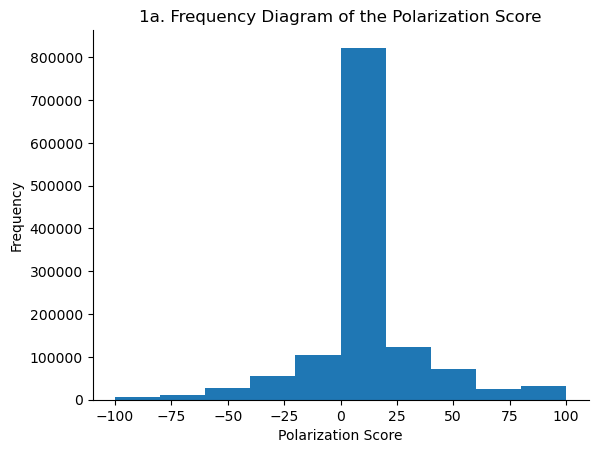

In [16]:
# Histogram of Y variable (polarity score)
fig, ax = plt.subplots()

tweet["polar_score"].plot.hist(bins=10, alpha=1)
ax.set_title("1a. Frequency Diagram of the Polarization Score")
ax.set_xlabel("Polarization Score")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

   We first explore how the Y variable looks in a histogram. This graph is a bi-model histogram, representing most of the polarity score lies between 0 and 25. This graph is consistent with the summary statistics above, with a mean of around 5, meaning that most people are lightly polarized.

For graphing analysis on X and Y variable, we need to re-classify the data.
Becasue one country/state might have multiple polarity score associated, I need to take all scores out and average them, then put the number under the country/state, before I can draw any graphs.
#### For X variables' relationship with Y variable graphs

In [17]:
# For X variable: created_time
c_time_country = {}
for a in range(len(tweet)):
    if tweet.iloc[a,22] not in c_time_country:
        c_time_country[tweet.iloc[a,22]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,22] in c_time_country:
        c_time_country[tweet.iloc[a,22]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_c_time = {}
for k,v in c_time_country.items():
    # v is the list of polarity scores for time k
    ave_c_time[k] = sum(v)/ float(len(v))
#ave_c_time.pop(np.nan) # clean obs that don't have a corresponding country, "nan" values

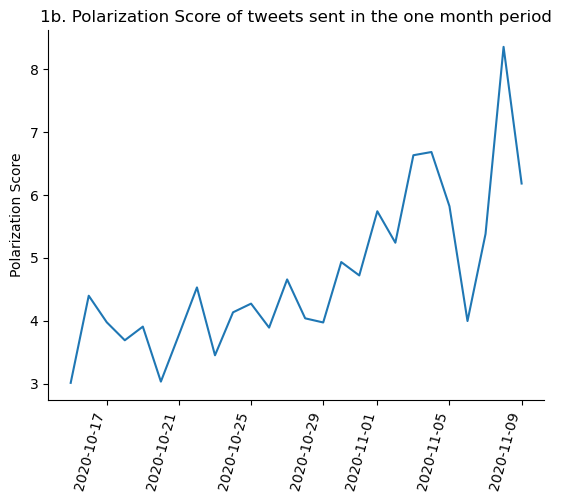

In [18]:
# now we plot the diagram
time_y = ave_c_time.keys()
score_t = ave_c_time.values()

fig, ax = plt.subplots()

ax.plot(time_y, score_t)
ax.set_title("1b. Polarization Score of tweets sent in the one month period")
ax.set_ylabel("Polarization Score")

for label in ax.get_xticklabels():
  label.set_rotation(75)
  label.set_ha('right')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
plt.show()

   The reason for choosing this X variable is explained above in the summary statistics section.
   In observing this graph, we see that, when it gets closer to the US election, people are getting more than more polarized across the one-month period. This graph follows our intuition as the debates over the election should become more aggressive over time.

In [19]:
# For X variable: country
dic_country = {}
for a in range(len(tweet)):
    if tweet.iloc[a,16] not in dic_country:
        dic_country[tweet.iloc[a,16]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,16] in dic_country:
        dic_country[tweet.iloc[a,16]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_country = {}
for k,v in dic_country.items():
    # v is the list of polarity scores for country k
    ave_country[k] = sum(v)/ float(len(v))
ave_country.pop(np.nan) # clean obs that don't have a corresponding country, "nan" values

5.186563303781924

In [20]:
# because we have too many countries in this sample, darwing all 180 countries would be a mess
# I will ramdonly choose 5 countries from 6 continents (except Antarctica), becasue Antarctica has little data 
# and hopefully they can help us closly predict the parameter
# the 35 countries are in the list below
country_list = ["Japan","India","China","Singapore","Thailand","Nigeria","Ethiopia","Egypt", \
                "Morocco","Mali","Panama","Cuba","Canada","Mexico","Dominica","Peru","Brazil","Guyana","Chile",\
                "Colombia","Poland","France","Germany","Austria","Greece",\
                "Fiji","New Zealand","Australia","Papua New Guinea","Vanuatu"]
# Now we abstract data within the ave_state dictionary
selc_ave_country = {}
for i in country_list:
    sel_c_score = ave_country[i]
    selc_ave_country[i] = sel_c_score

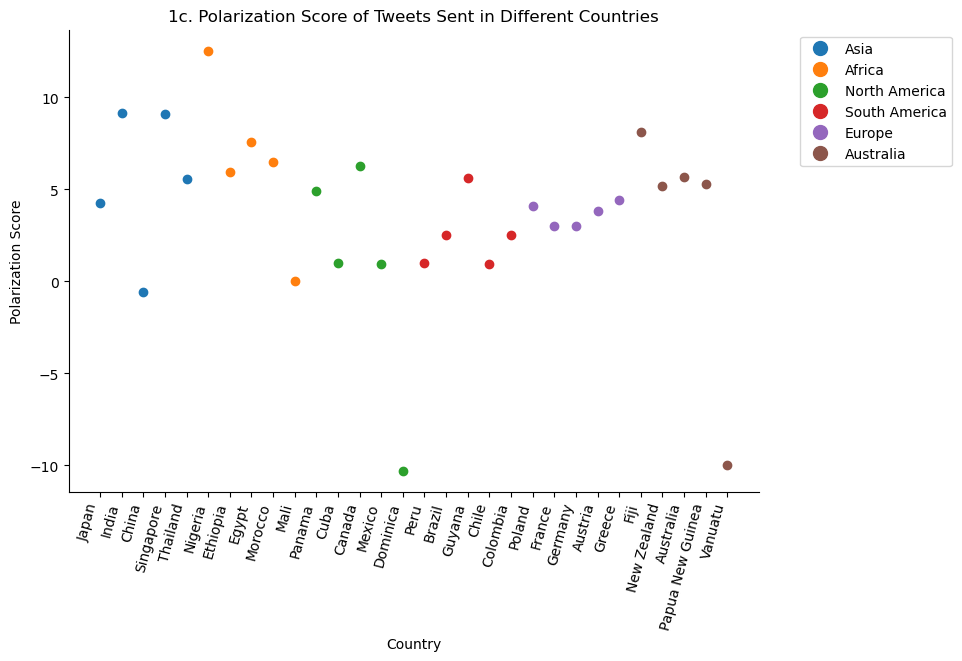

In [21]:
country = selc_ave_country.keys()
score_country = selc_ave_country.values()

fig, ax = plt.subplots(figsize=(12, 6))

# calculate the number of colors needed
num_colors = len(country) // 5 + 1

# create an array of colors using the 'tab10' colormap
colors = plt.cm.tab10(np.arange(num_colors))

# initialize a color index
color_index = 0

# plot each 5 point with a different color
for i, (c, s) in enumerate(zip(country, score_country)):
    ax.scatter(c, s, color=colors[color_index])
    if i % 5 == 4:
        color_index += 1

# create handles and labels for the legend
handles = [plt.plot([],[], marker="o", ls="", color=colors[i], markersize=10)[0] for i in range(num_colors)]
labels = ["Asia", "Africa", "North America", "South America", "Europe", "Australia"][:num_colors]

# add the legend to the plot
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title("1c. Polarization Score of Tweets Sent in Different Countries")
ax.set_ylabel("Polarization Score")
ax.set_xlabel("Country")
# rotate the axis so we can see
for label in ax.get_xticklabels():
  label.set_rotation(75)
  label.set_ha('right') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(right=0.7)
plt.show()
# notice for this part, we have to also combine our knowledge of geographic distribution before formal interpretation

   The reason for choosing this X variable is explained above in the summary statistics section.
   
   In this graph, I intentionally put sampling countries from the same continent together. Meanwhile, a different colour represent sample countries from one continent. Thus, it would be easy for us to ocmpare the score over different continents.
   
   By observing this graph, I found that tweets from Asian countries are more polarized because I ranked the countries according to their continents. In contrast, tweets in North America are overall less polarized. This phenomenon could result from a cultural difference at first glance.

In [22]:
# For X variable: followers
dic_followers = {}
for a in range(len(tweet)):
    if tweet.iloc[a,11] not in dic_followers:
        dic_followers[tweet.iloc[a,11]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,11] in dic_followers:
        dic_followers[tweet.iloc[a,11]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_followers = {}
for k,v in dic_followers.items():
    # v is the list of polarity scores for country k
    ave_followers[k] = sum(v)/ float(len(v))
#ave_followers.pop(np.nan) # clean obs that don't have a corresponding country, "nan" values

In [23]:
# becasue X variables are not in order of smallest to largest, so I need to sort the keys
followers_keys = list(ave_followers.keys())
followers_keys.sort()
sorted_followers = {i: ave_followers[i] for i in followers_keys}

In [24]:
# for better visualization, we drop the last 4 biggest outliers
sorted_followers.pop(82396310.0)
sorted_followers.pop(82396325.0)
sorted_followers.pop(82417077.0)
sorted_followers.pop(82417099.0)

19.53125

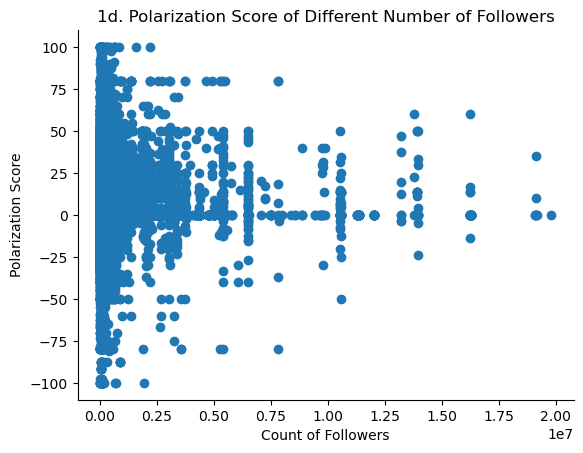

In [25]:
c_followers = sorted_followers.keys()
score_followers = sorted_followers.values()

fig, ax = plt.subplots()

ax.scatter(c_followers, score_followers)
ax.set_title("1d. Polarization Score of Different Number of Followers")
ax.set_ylabel("Polarization Score")
ax.set_xlabel("Count of Followers")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

   The reason for choosing this X variable is the same as what has been explained above in the summary statistics section: I want to find out if people of bigger power of social media influence will be more opinionated or less(higher polarization score or lower).
   
   Note that the x-axis has units of 2.00 le7, this is equivalent to 20 million, meaning the number of fans goes from 0 to 20 million. Although this is a wild spread of number of fans, I believe it's the best way to show the overall trend and not to fix this. I tried to do a natural log over the number of fans, but as we have too many accounts that don't have any fans, the graph looks even worse.
   
   Even though the scatters and the dots are spread out largly, there is still a sign of a positive relationship, even though that might not be siginficant. In the following parts, I am going to draw more helpful indicators on this graph. However, we will look at the graph mostly at the first glance. This graph shows an upward-sloping relationship between fans owned and polarization score. One way to see this is through comparing the lowest polarization score given the count of followers. This graph says that people with more fans, or people more influential on Twitter, are likely to send out more polarized tweets.

In [26]:
# For X variable: join_year
dic_j_year = {}
for a in range(len(tweet)):
    if tweet.iloc[a,23] not in dic_j_year:
        dic_j_year[tweet.iloc[a,23]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,23] in dic_j_year:
        dic_j_year[tweet.iloc[a,23]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_j_year = {}
for k,v in dic_j_year.items():
    # v is the list of polarity scores for country k
    ave_j_year[k] = sum(v)/ float(len(v))
ave_j_year.pop(1970) # pop out the outlier

0.0

In [27]:
join_year_keys = list(ave_j_year.keys())
join_year_keys.sort()
sorted_ave_j_year = {i: ave_j_year[i] for i in join_year_keys}

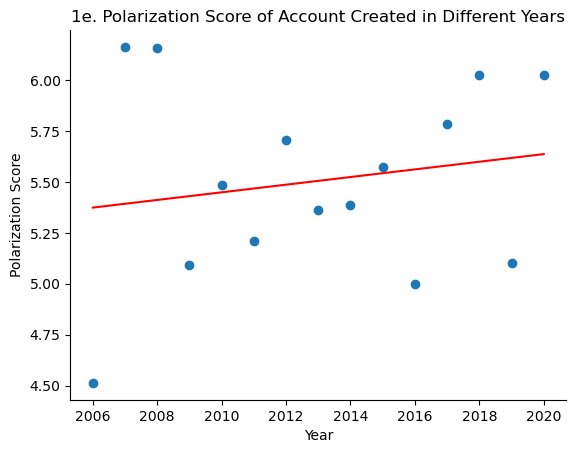

In [28]:
# start drawing the graph
join_year = list(sorted_ave_j_year.keys())
score_join = list(sorted_ave_j_year.values())

fig, ax = plt.subplots()

ax.scatter(join_year, score_join)
ax.set_title("1e. Polarization Score of Account Created in Different Years")
ax.set_ylabel("Polarization Score")
ax.set_xlabel("Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add trend line in red color
z = np.polyfit(join_year, score_join, 1)
p = np.poly1d(z)
ax.plot(join_year, p(join_year), color='red')

plt.show()


   The reason for choosing this X variable is explained above in the summary statistics section.
   
   For better observations, I also drew a red trendline shown above. I didn't make this a line graph, because the dots are too spread out - so a line graph won't visually look good. Instead, scatter plot with a trend line does a better job here.
   
   In observing this graph, we see an upward-sloping relationship between join_year and polarization score. So this graph is saying that people who registered later, people who have less internet experience are likely to send out more polarized tweets.

In [29]:
# For X variable: state
dic_state = {}
for a in range(len(tweet)):
    if tweet.iloc[a,18] not in dic_state and tweet.iloc[a,16] == "United States of America":
        dic_state[tweet.iloc[a,18]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,18] in dic_state and tweet.iloc[a,16] == "United States of America":
        dic_state[tweet.iloc[a,18]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_state = {}
for k,v in dic_state.items():
    # v is the list of polarity scores for country k
    ave_state[k] = sum(v)/ float(len(v))
ave_state.pop(np.nan) # clean obs that don't have a corresponding state, "nan" values

12.41732804232804

In [30]:
# becasue there are too many states, we will focus on the slected states in the United States by locations
# whether they are in east or west coast
# List taken from: https://worldpopulationreview.com/states
east_states = ["New York", "Ohio", "Georgia", "North Carolina", "Michigan"]
west_states = ["California", "Texas", "Florida", "Arizona", "Colorado"]

state_list = west_states + east_states
# Now we abstract data within the ave_state dictionary
us_ave_state = {}
for i in state_list:
    state_score = ave_state[i]
    us_ave_state[i] = state_score

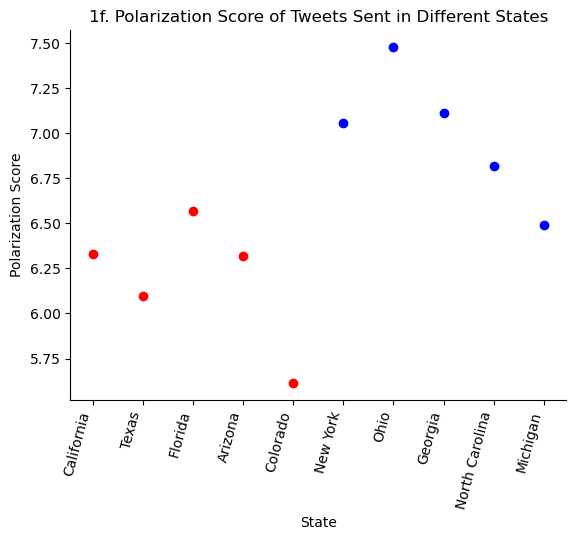

In [31]:
# now we can plot the graph
the_state = us_ave_state.keys()
score_state = us_ave_state.values()

fig, ax = plt.subplots()

# make the first 8 observations red, and the remaining blue
ax.scatter(list(the_state)[:5], list(score_state)[:5], color='red')
ax.scatter(list(the_state)[5:], list(score_state)[5:], color='blue')

ax.set_title("1f. Polarization Score of Tweets Sent in Different States")
ax.set_ylabel("Polarization Score")
ax.set_xlabel("State")
# rotate the axis so we can see
for label in ax.get_xticklabels():
  label.set_rotation(75)
  label.set_ha('right')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
# notice for this grap, we have to also combine our knowledge of geographic distribution before formal interpretation


   The reason for choosing this X variable is explained above in the summary statistics section.
   
   To better observe the plot, I have east coast states blue and the west coast states blue.
   
   Observing this graph, we have to consider the location of where the states. After taking into the effect of that, we see that people who live on the east side of the United States tend to send more polarized tweets than those on the west side. I suspect it's because of the cultural difference and people's living habits between the two coasts.

# 2. Part 2

## 2.1 The Message

Going back to the main research problem again. This paper is to work on an overall sentiment and polarization analysis during the 2020 election by researching into the economic variables chosen(economic in both user specific - location, social media influence, etc., and economy specific - GDP, population, etc. coming in the following sections). Thus, our main focus here is to investigate how those variables show predicitions on the polarization score. If we are to summarize and provide a single sentence message, we would say that: economic terms such as diversity score, education levels and created day can well predict polarization score, while some other terms do not show economically significant relationships.

However, let's still look into those relationships one by one first. From the above general graphs, we get to know that the following relationships may exist between the X and Y variables:

- People get more polarized when it gets closer to the election date (created_time)
- Residents in the east of the US tend to send out more positive tweets than that in the west (states)
- Asian countries tend to have more positive sentiments than other continents (countries)
- People of less internet exposure tend to send out more positive content (join_year)
- The more fans an account has, the more positive content it sends (fans_owned)

Because in the above graphs, we already see a significant relationship for X variable "time"(tweet posted time). Thus, in the following section, I will focus on the other four variables where I can dig deeper and see if the true significant relationships exist.
We will now dig into the details and draw better graphs and maps to show the remaining relationships.

### 2.1.1 Detailed Graphs

#### Polarization socre VS. location of the tweet within the US

We draw two graphs to explore whether and by how much people's polarization scores differ across the United States. Two graphs show the ten states with the highest and lowest polarization scores, respectively. We start with the highest polarization score and then the lowest.

In [32]:
# Frist I sort the values of polarization score from highest to lowest and vice versa
# This dictionary is taken from Part 1 which was already cleaned and taken from the raw dataset
ave_state = dict(sorted(ave_state.items(), key=lambda item: item[1]))
ave_state_low = dict(list(ave_state.items())[1:11])
ave_state_high = dict(list(ave_state.items())[-11:-1])
# I drop one lowest and one highest for better visualization and potential errors
# now transfer low to dataframe object
low_state = pd.DataFrame(ave_state_low, index=['0']).transpose()
low_state = low_state.rename(columns={'0': 'Polarization Score'})
# now transfer high to dataframe object
high_state = pd.DataFrame(ave_state_high, index=['0']).transpose()
high_state = high_state.rename(columns={'0': 'Polarization Score'})

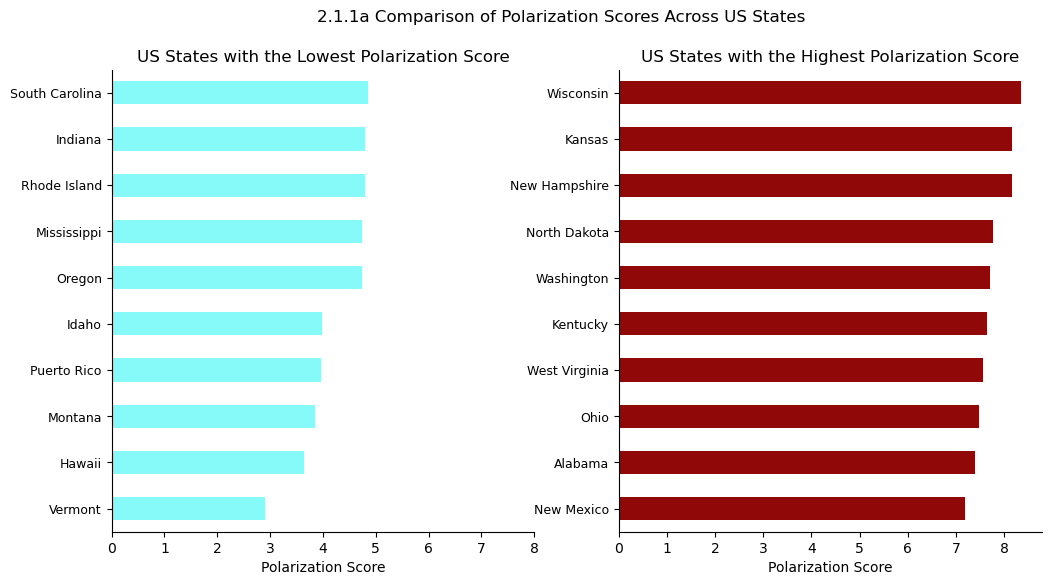

In [33]:
import colorsys

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot data on first subplot
low_state["Polarization Score"].plot(kind="barh", ax=ax1, color=colorsys.hls_to_rgb(0.5, 0.75, 0.9))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title("US States with the Lowest Polarization Score")
ax1.tick_params(axis='y', labelsize=9)  # set font size for y-axis
ax1.set_xlabel("Polarization Score")  # set label for x-axis
ax1.set_xlim([0, 8])  # set x range to better compare relatively

# plot data on second subplot
high_state["Polarization Score"].plot(kind="barh", ax=ax2, color=colorsys.hls_to_rgb(0, 0.3, 0.9))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title("US States with the Highest Polarization Score")
ax2.tick_params(axis='y', labelsize=9)  # set font size for y-axis
ax2.set_xlabel("Polarization Score")  # set label for x-axis
# saturation of colour 0.3 and 0.75 should work 
# whether you have a black-and-white printer or a coloured printer


# add a title to the figure
fig.suptitle('2.1.1a Comparison of Polarization Scores Across US States')

# display the plot
plt.show()

We can refer to some interesting conclusions from this graph:
- Even the lowest-scoring states have scores above 0, meaning people in the US are at least somewhat positively polarized.
- I intentionally set both axes into the same scale of 8 to better compare - and it turns out that the difference between the highest and lowest scores is not big(5 vs 8). Thus, we should not conclude that there is a significant difference in the polarization score across the country.
- However, if we are to compare, we find that most high-scoring states are in the east of the US(Wisconsin, Ohio, Kentucky, West Virginia and etc), while lots of low-scoring states are in the south(Montana, Idaho, Oregon and etc.). So maybe we can refer to the fact that residents in the east of the US tend to send out more positive tweets than those in the west.
- The potential reason for such distribution can be different cultures and environment. For example, in Canada, Vancouver people tend to be more relaxed and less busy than those who live in Toronto - this different in culture and living environment can cause people to be differently polarized.

However, we will address this question better in the below mapping section, where I directly show the map for the polarization within the US. I am offering this graph here so we can have different perspectives to see if the phenomenon we observe is valid.

#### Polarization socre VS. User Registered Time

To explore closer on whether and by how much people's polarization scores differ according to their registered time, we draw the following graph.

In [34]:
# get the data already sorted above to dataframe object
j_time_df = pd.DataFrame(sorted_ave_j_year, index=['0']).transpose()
j_time_df = j_time_df.rename(columns={'0': 'Polarization Score'})
j_time_df.head()

,Polarization Score
2006,4.513933
2007,6.161339
2008,6.154552
2009,5.092695
2010,5.484562


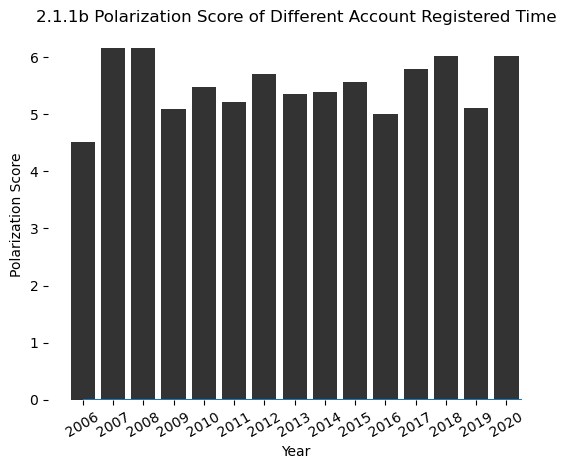

In [35]:
fig, ax = plt.subplots()

colors = ["r" if x < 0 else "k" for x in j_time_df["Polarization Score"].values] # define colour
bars = ax.bar(np.arange(len(colors)), j_time_df["Polarization Score"].values, color=colors, alpha=0.8)
ax.hlines(0, 0, 14.5) # get the bottom line of the graph
ax.set_xticks(np.arange(len(j_time_df.index)))
ax.set_xticklabels(j_time_df.index)
ax.tick_params(axis='x', labelrotation=30)# rotate the x-axis so we see better

ax.set_title("2.1.1b Polarization Score of Different Account Registered Time")
# set the axis
plt.ylabel("Polarization Score")
plt.xlabel("Year")
# remove the boundaries
for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

This graph proves the otherwise to the conclusion we made above. In the scatter plot in Part 1, we see a slight increase in the polarization score as the account registered time grows - I thought that made sense because intuitively that people who has less experience with internet tend to be less cautious on what they say - thus might be more polarized. However, the bar graph shows that the level of socres is very stable at around 5. This bar chart is not positively or negaively skewed - and it also does not show any uni-model or bi-model attribute. Thus, we can conclude there isn't a strong eveidence to support the relationship between people's exposure to internet and their polarization score. 

Why in the previous part we see a positive trend? The potential reason could be the misleading scale of the y-axis. Because we are drawing a bar chart in this case, the y-axis is re-adjusted to 0, which gives us better comparison.

However, the variable "registered time" is ambiguous and could be connected to various factors. For example, we cannot see clear relationships in this bar plot. Is it because our sample is too mixed, and we should also control other variables? 

Therefore, I will create a map below for this X variable in the mainland United States exclusively, narrowing down the data range and controlling for other potential lurking variables - just to see how the registered time correlate to location and polarization score.

#### Polarization socre VS. Number of Fans Owned

To explore closer whether and by how much people's polarization scores differ with the different numbers of followers, I update the graph from Part 1. Because a single scatter plot makes people hard to identify the trend, I will add a trend line onto the graph and see if the relationship between the X and Y truly exists.

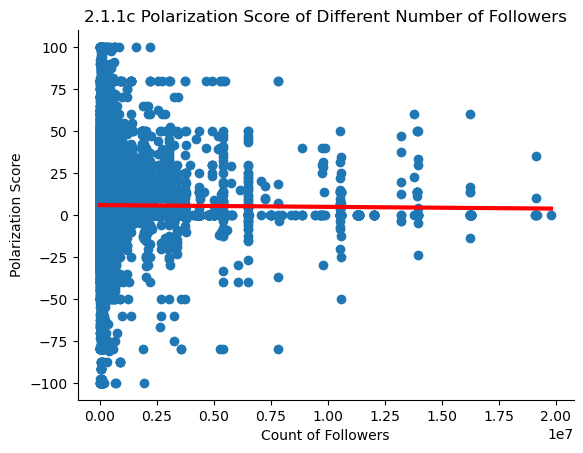

In [36]:
c_followers = list(sorted_followers.keys())
score_followers = list(sorted_followers.values())

# Fit a polynomial line of degree 1 (i.e., a straight line) to the data
z = np.polyfit(c_followers, score_followers, 1)
p = np.poly1d(z)

fig, ax = plt.subplots()

ax.scatter(c_followers, score_followers)
ax.plot(c_followers, p(c_followers), "-", color="red", linewidth=3)
ax.set_title("2.1.1c Polarization Score of Different Number of Followers")
ax.set_ylabel("Polarization Score")
ax.set_xlabel("Count of Followers")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Thus, our conclusion above is likely wrong. In the findings above, I inferred that people with more fans tend to be more polarized by visualization.

Again, the reason to look into this relationship is that, we want to figure out how a person's social influence affect the way they speak. Are those people famous because they are polarized? Or are they famous because they are not polarized and are open to other new opinions? And this graph show that those two variables are not necessarily correlated.

Thus, with the help of an almost perfect horizontal trend line, we should infer that:
- There isn't sufficient proof to say a significant or apparent relationship exists between fans owned and peole's polarization score.

## 2.2 Maps and Interpretation

### 2.2.1 Map for Polarization Within the US (X: States in the US, Y: Polarization Score)

In [37]:
# I will first get the sorted list of the polarization score and the US state list here first
# I will use low_state dataframe just for convience
map_ave_state = pd.DataFrame(ave_state, index=['0']).transpose()
map_ave_state = map_ave_state.rename(columns={'0': 'Polarization Score'})
map_ave_state.head()

,Polarization Score
Guam,-7.142857
Vermont,2.911125
Hawaii,3.650321
Montana,3.853223
Puerto Rico,3.966241


In [38]:
# now we get the state gpd data
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
# now we merge the two files
merge_state_map = state_df.merge(map_ave_state, left_on="NAME", right_index=True, how="inner")
# drop a few outliers due to small amount of observations
# and we will focus on only the mainland states
# because only mainland states concern the research questions
condition_state_1 = (state_df['NAME'] == 'Guam') # specify the condition to delete
merge_state_map = merge_state_map.drop(state_df[condition_state_1].index)
condition_state_3 = (state_df['NAME'] == 'Hawaii') # specify the condition to delete
merge_state_map = merge_state_map.drop(state_df[condition_state_3].index)
condition_state_2 = merge_state_map.bounds['maxx'] >= 165
merge_state_map = merge_state_map.loc[~condition_state_2] # delete rows that satisfy the condition
condition_state_4 = merge_state_map.bounds['miny'] <= 20
merge_state_map = merge_state_map.loc[~condition_state_4] # delete rows that satisfy the condition
# last but not least, we want to standardize the polarization score so it's from -1 to 1
merge_state_map['norm_polar'] = (2*(merge_state_map['Polarization Score']-\
                                    merge_state_map['Polarization Score'].min()) \
                             / (merge_state_map['Polarization Score'].max()-\
                                merge_state_map['Polarization Score'].min())) - 1
# now take a look at the gpd file
merge_state_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Polarization Score,norm_polar
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",7.400287,0.646834
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6.316276,0.249168
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",5.614710,-0.008199
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115...",5.192894,-0.162941
5,12,00294478,0400000US12,12,FL,Florida,00,138924199212,31386038155,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...",6.569701,0.342136


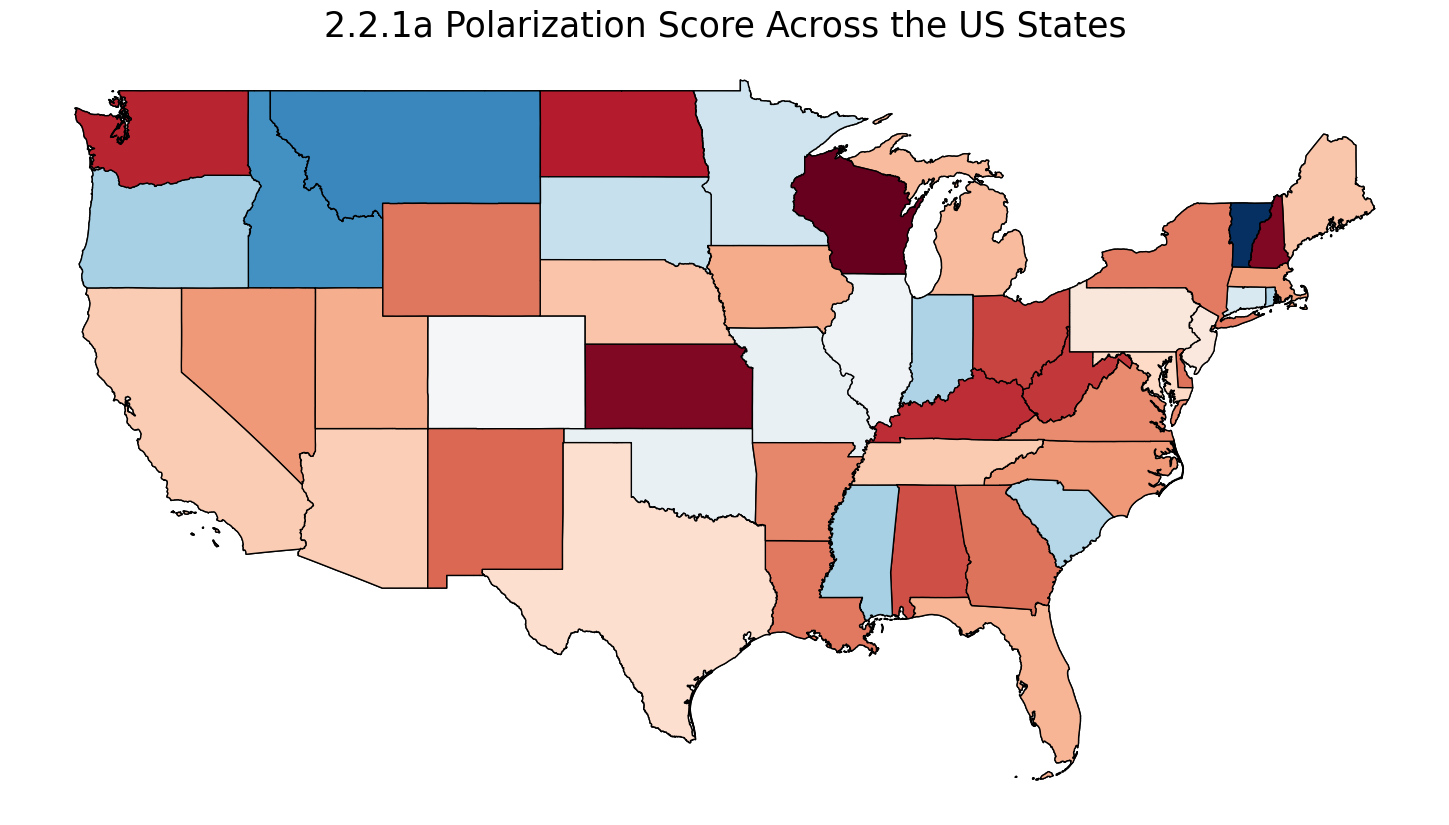

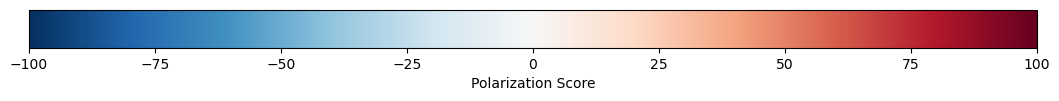

In [39]:
# now we start to graph
# start with the U.S. map layer
fig, gax = plt.subplots(figsize=(20,10))
merge_state_map.plot(ax=gax, edgecolor='black',color='white')
# then we map the colour of polarization score
merge_state_map.plot(
    ax=gax, edgecolor='black', column="Polarization Score", legend=False, cmap='RdBu_r',
)
plt.title('2.2.1a Polarization Score Across the US States', fontsize = 25)
plt.axis('off')

# we now create a colorbar
fig, ax = plt.subplots(figsize=(13, 1))
fig.subplots_adjust(bottom=0.5)

cmap = 'RdBu_r'
norm = mpl.colors.Normalize(vmin=-100, vmax=100)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Polarization Score')

# end of colorbar
plt.show()

This map shows a better visualization of the polarization score across the United States. Meanwhile, we inferred from the previous part that: we should not conclude that there is a significant difference in the polarization score across the country, and if we are to compare, we find that most high-scoring states are in the east of the US(darker red), while lots of low scoring states are in the south(lighter red and blue).

The previous conclusion that "there isn't a significant difference in the polarization score across the country" is true, as most states are positively polarized across the United States. However, the conclusion that "most high-scoring states are in the east of the US, while lots of low-scoring states are in the south" might not be true. Low-scoring states are mostly in the northwest instead of the west, while the eastern states tend to be more polarized overall. Thus, This map would mean that peope in the east of the US tend to send out more extreme, less open-mind, more opinionized tweets than those in the northwest of the US.

Again, just to remind you again what polarization score means, becasue this is a long paper, and I hope you don't have to find some interpretation again and again over the paper - a high polarization implies the tweet is less inclusive, extreme, opinionated and judgmental.

Thus, the official conclusion regarding polarization score and the geographical location within the United States is as follows:
- We should not conclude that there is a significant difference in the polarization score across the country.
- However, comparatively, low polarization scoring states are mostly in the northwest, while the eastern states tend to be more polarized overall.

### 2.2.2 Map for Account Created Time (X: Average time of Year when the account was created in the US)

The only two relationships left to dig deeper into are the following:
- Asian countries tend to have more positive sentiments than other continents (countries)
- People of less internet exposure  tend to send out more positive content (join_year)
I will use the remaining two maps to research more on those relationships.

Meanwhile, as mentioned above: 

The variable "registered time" is ambiguous and could be connected to various factors. For example, we cannot see clear relationships in the above bar plot. Is it because our sample is too mixed, and we should also control for other variables? 

Therefore, I am going to create a map here for this X variable(registered time) in the mainland United States exclusively, narrowing down the data range and controlling for other potential lurking variables - to see how the registered time correlate to location and polarization score.

In [40]:
# For X variable: join_year
dic_j_year_map = {}
for a in range(len(tweet)):
    if tweet.iloc[a,18] not in dic_j_year_map and tweet.iloc[a,16] == "United States of America":
        dic_j_year_map[tweet.iloc[a,18]] = [tweet.iloc[a,-3]]
    elif tweet.iloc[a,18] in dic_j_year_map and tweet.iloc[a,16] == "United States of America":
        dic_j_year_map[tweet.iloc[a,18]].append(tweet.iloc[a,-3])
# Now take average of year
ave_j_year_map = {}
for k,v in dic_j_year_map.items():
    # v is the list of average created year rounded for country k
    ave_j_year_map[k] = round(sum(v)/ float(len(v)))

In [41]:
# transfer the list into a pandas object
state_year_map = pd.DataFrame(ave_j_year_map, index=['0']).transpose()
state_year_map = state_year_map.rename(columns={'0': 'Ave Registered Year'})
state_year_map.head()

,Ave Registered Year
Oregon,2011
District of Columbia,2013
California,2013
Ohio,2014
Pennsylvania,2013


In [42]:
# because we already have a US mainland map editted
# I will merge this new data into it and start drawing
merge_state_map = merge_state_map.merge(state_year_map, left_on="NAME", right_index=True, how="inner")
merge_state_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Polarization Score,norm_polar,Ave Registered Year
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",7.400287,0.646834,2012
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6.316276,0.249168,2013
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",5.614710,-0.008199,2013
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115...",5.192894,-0.162941,2013
5,12,00294478,0400000US12,12,FL,Florida,00,138924199212,31386038155,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...",6.569701,0.342136,2013


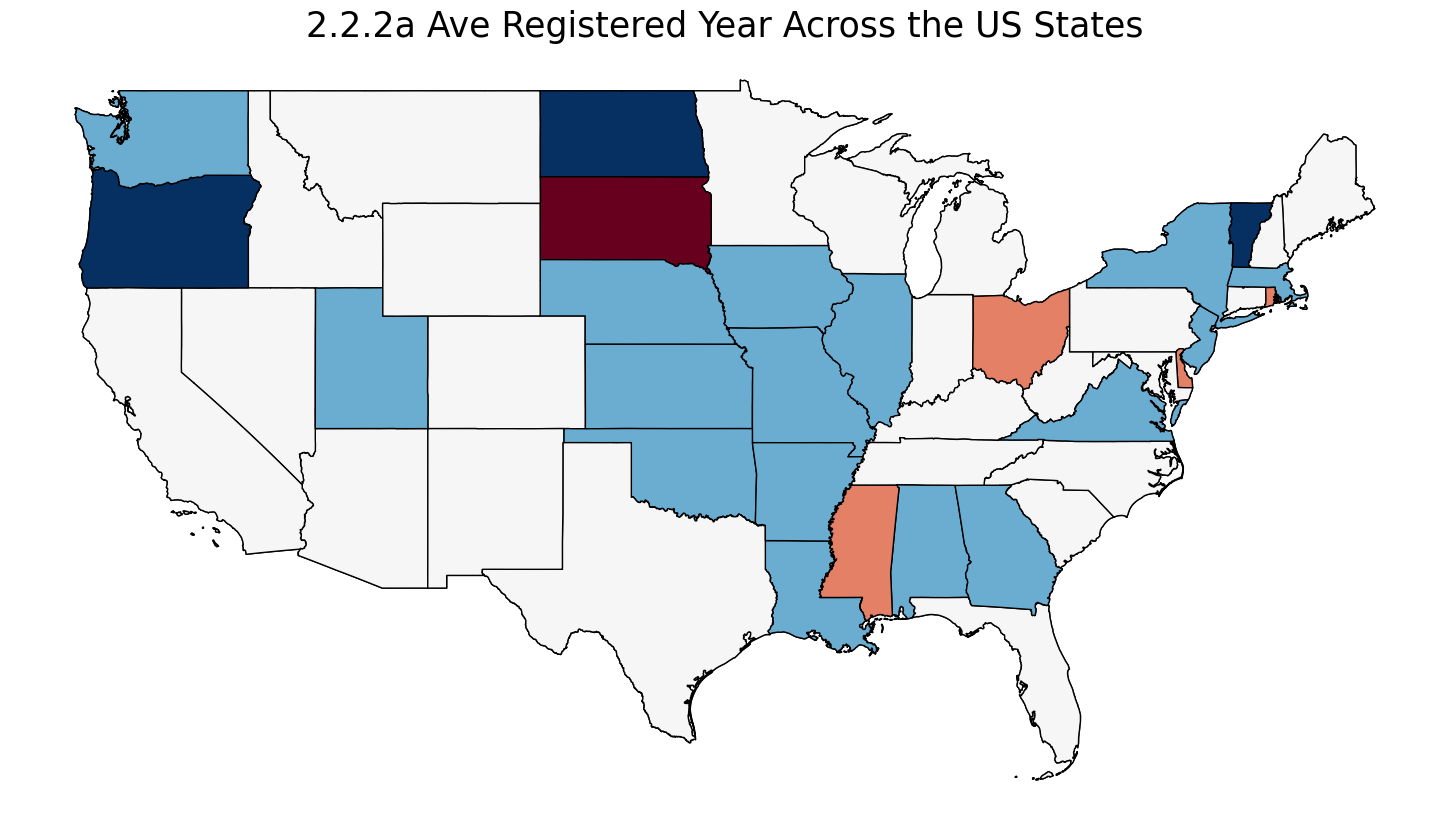

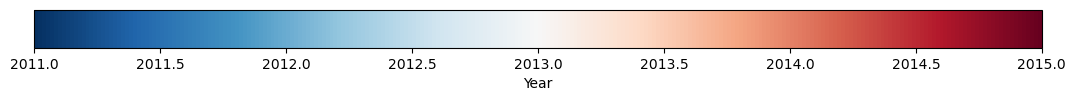

In [43]:
# now we start to graph
fig, gax = plt.subplots(figsize=(20,10))
merge_state_map.plot(ax=gax, edgecolor='black',color='white')
# then we map the colour of polarization score
merge_state_map.plot(
    ax=gax, edgecolor='black', column="Ave Registered Year", legend=False, cmap='RdBu_r',
)
plt.title('2.2.2a Ave Registered Year Across the US States', fontsize = 25)
plt.axis('off')

# we now create a colorbar
fig, ax = plt.subplots(figsize=(13, 1))
fig.subplots_adjust(bottom=0.5)

cmap = 'RdBu_r'
norm = mpl.colors.Normalize(vmin=2011, vmax=2015)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Year')

# show the graph
plt.show()

From this graph alone, we can identify that most states' average Twitter accounts registered time ranges from 2012 to 2014. Meanwhile, most western states have a registered time of 2013, while many middle and eastern states have a registered time of 2011.

However, this map alone does not tell any correlations or relationships. Thus, I will draw the two maps together to see potential relationships.

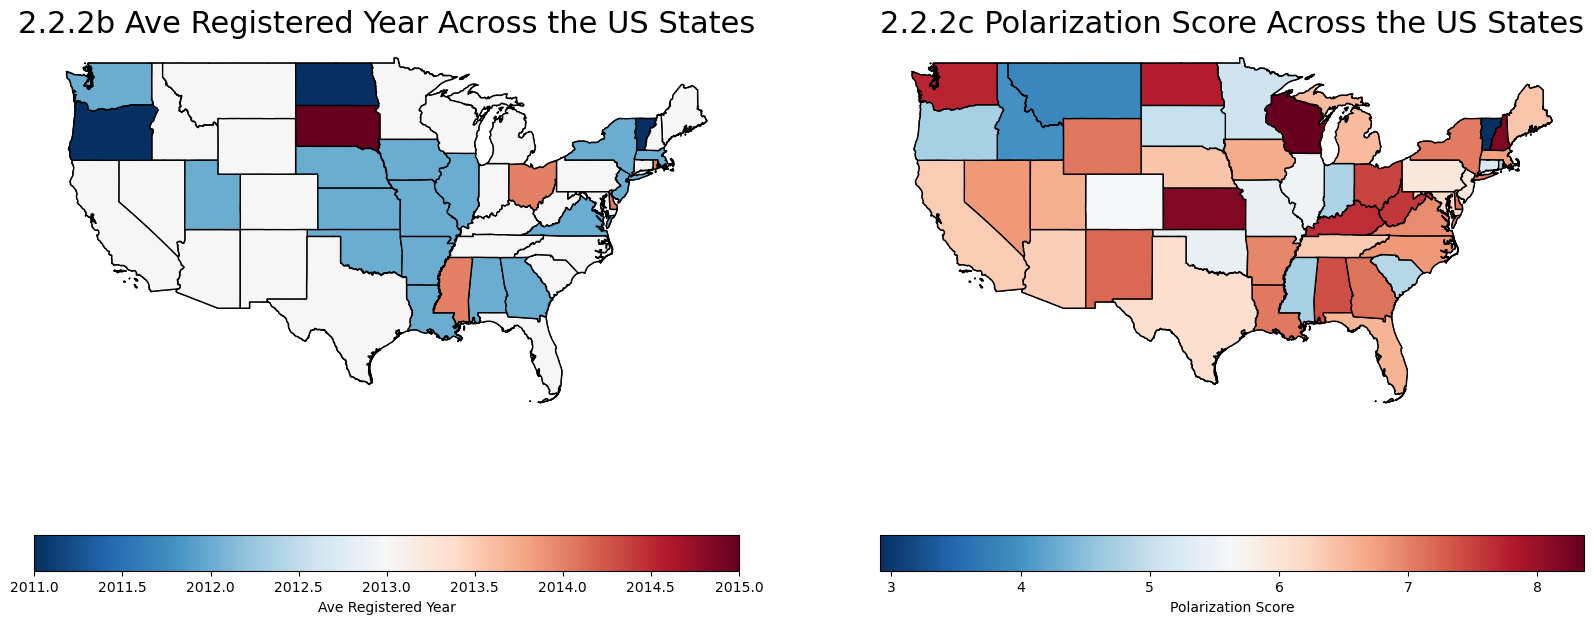

In [44]:
# now I want to draw this map with the polarization map together
# so I can see potential relationships
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# plot Ave Registered Year on the first subplot
merge_state_map.plot(ax=ax1, edgecolor='black', color='white')
merge_state_map.plot(ax=ax1, edgecolor='black', column="Ave Registered Year", legend=False, cmap='RdBu_r')
ax1.set_title('2.2.2b Ave Registered Year Across the US States', fontsize=22)
ax1.axis('off')
# plot Polarization Score on the second subplot
merge_state_map.plot(ax=ax2, edgecolor='black', color='white')
merge_state_map.plot(ax=ax2, edgecolor='black', column="Polarization Score", legend=False, cmap='RdBu_r')
ax2.set_title('2.2.2c Polarization Score Across the US States', fontsize=22)
ax2.axis('off')

# create a colorbar for the first map
fig.colorbar(ax1.collections[1], ax=ax1, orientation='horizontal', label='Ave Registered Year')
# create a colorbar for the second map
fig.colorbar(ax2.collections[1], ax=ax2, orientation='horizontal', label='Polarization Score')
# show the plot
plt.show()

Here are two graphs together, the one on the left is a US map with a different Twitter account registered time; the one to the right is the US map with varying polarization scores.

In the previous parts, with graph 2.1.1b, we conclude that there isn't any strong relationship between the polarization score and the account-created time. However, when comparing these two graphs, there is some correlation.

We can see that most states that are more polarized(red in the right graph) were registered around 2013(white in the left graph); most states that are less polarized(light blue in the right graph) were registered around 2011(deep blue in the left graph); especially when we look at the states in the south-west. Thus, we can infer that: the later the account is created, the more polarized the posted content is. This conclusion aligns with the observation in graph 1e.

The potential reason for observing a trend here could be mentioned above: there might be unobserved lurking variables. We get to see a better relationship as I narrow down the data range and potentially eliminate the effect of those variables.

However, to dig deeper, we must run a multi-regression model and control for other factors to see the real trend.

### 2.2.3 Maps for Polarization Acorss the World (X: Countries in the World, Y: Polarization Score)

To research on the last relationship, polarization score vs different countries, I draw a world map to show potential relationships.

In [45]:
# We use the following code to generate 1 polarization score for 1 country 
# (taking average of multiple scores)
# For X variable: country
dic_country_map = {}
for a in range(len(tweet)):
    if tweet.iloc[a,16] not in dic_country_map:
        dic_country_map[tweet.iloc[a,16]] = [tweet.iloc[a,25]]
    elif tweet.iloc[a,16] in dic_country_map:
        dic_country_map[tweet.iloc[a,16]].append(tweet.iloc[a,25])
# Now take average of polarity score
ave_country_map = {}
for k,v in dic_country_map.items():
    # v is the list of polarity scores for country k
    ave_country_map[k] = sum(v)/ float(len(v))
ave_country_map.pop(np.nan) # clean obs that don't have a corresponding country, "nan" values

5.186563303781924

In [46]:
# transfer the dictionary into a list first, so we can manually change some data to better merge the datasets
country_keys = list(ave_country_map.keys())
country_values = list(ave_country_map.values())
# there are two countries that hvae different names in the two dataset
# so I am going to change the name in the tweet dataset to match the other one
for i in range(len(country_keys)):
    if country_keys[i] == "Republic of the Congo":
        country_keys[i] = "Congo"
    elif country_keys[i] == " South Sudan":
        country_keys[i] = "S. Sudan"
# combine the two lists and generate a dataframe object
whole_country_list = [country_keys] + [country_values]
country_map = pd.DataFrame(whole_country_list, index=['country','polarization']).transpose()
# drop a few outliers due to small tweet observations
country_map = country_map.drop(132)
country_map = country_map.drop(186)
country_map = country_map.drop(184)
country_map = country_map.drop(179)
# we want to normalize the value from -1 to 1
country_map['norm_polar'] = (2*(country_map['polarization']-country_map['polarization'].min()) \
                             / (country_map['polarization'].max()-country_map['polarization'].min())) - 100
country_map.head()

,country,polarization,norm_polar
0,United States of America,6.386347,-98.945273
1,United Kingdom,7.728652,-98.883859
2,Germany,2.995055,-99.100432
3,United States,6.018851,-98.962087
4,Australia,5.65826,-98.978584


In [47]:
# now we import the world map and start drawing
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [48]:
# now we put the ploarization score into the world data
country_polar_map = world.merge(country_map, left_on="name", right_on="country", how="inner")
country_polar_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,polarization,norm_polar
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,8.138856,-98.865092
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,5.200445,-98.99953
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,6.242997,-98.951831
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,6.386347,-98.945273
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,7.235663,-98.906415


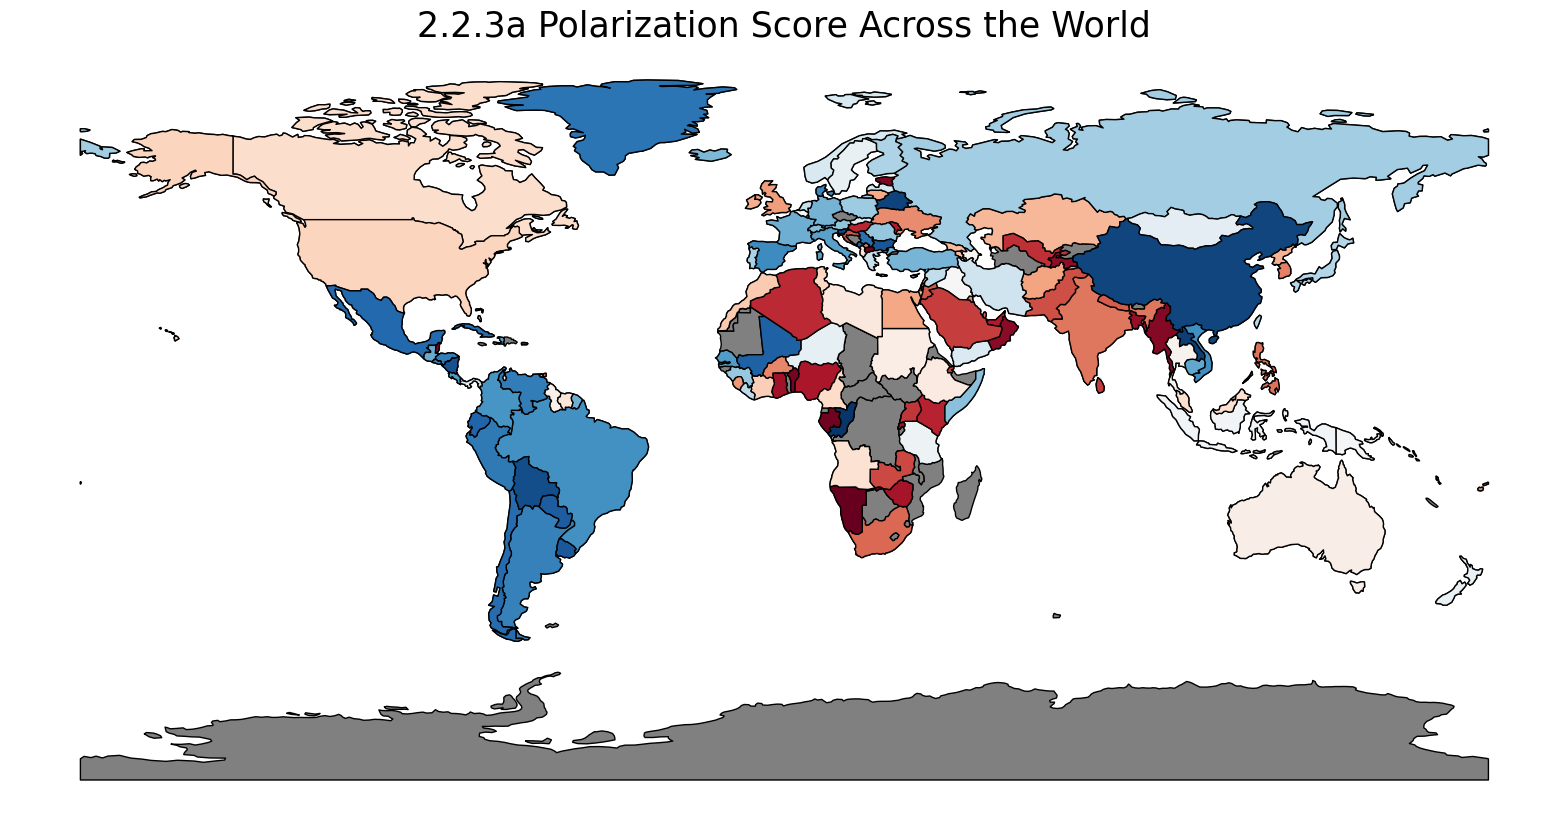

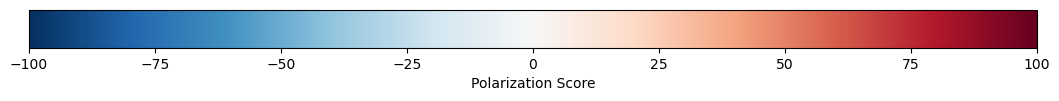

In [100]:
# start with the world map layer
fig, gax = plt.subplots(figsize=(20,10))
world.plot(ax=gax, edgecolor='black',color='gray')

# then we map the colour of polarization score
country_polar_map.plot(
    ax=gax, edgecolor='black', column="norm_polar", legend=False, cmap='RdBu_r',
)

plt.title('2.2.3a Polarization Score Across the World', fontsize = 25)
plt.axis('off')

# we now create a colorbar
fig, ax = plt.subplots(figsize=(13, 1))
fig.subplots_adjust(bottom=0.5)

cmap = 'RdBu_r'
norm = mpl.colors.Normalize(vmin=-100, vmax=100)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Polarization Score')
# end of colorbar

plt.show()

This graph shows that polarizations of tweets across the world have huge differences. North America tends to have more positive tweets, while South America and Europe tend to have more negative tweets. While Australian countries were in the middle ground - not too positive nor negative, African countries had mixed polarization scores across the continent with some missing observations(as no tweets are posted from those countries, and those countries are filled in gray). And this conclusion aligns with the conclusion above.

The potential difference can be of many reseaons, such as level of incomes, educations, living environment, cultures and etc; or it could be the combined effects of all of those variables. To dig deeper into the trends and the root reasons for those patterns, we might need further data and more specific arguments. In the following parts, I am going to use the diversity score as a new varialbe to try and explain the potential pattern here.

# 3. Part 3

In the above analysis, we have looked into various relationships. Some variables in this paper are very straightforward in their reasoning (fans_owned, created_time, join_year), as I did in the above sections. However, for some other variables, we did not dig into the details of why they exhibit such relationships. Especially for the two geographic variables(states and countries), there are other factors that could be the root reason for exhibiting the geographical patterns we see(income, diversity, population and etc.). Thus, in the following part, we will scrape and use some other datasets and dig into the potential factors that affect specifically the geographical distribution of the polarization score.

## 3.1 Potential Data to Scrape

### 3.1.1 Potential dataset 1

For this project, the main research question is on sentiments and polarization analysis on social media content with the most frequently investigated variables. However, it's important to notice again that I used the 2020 US election results. Meanwhile, in the introduction, I also mentioned how election data could offer particular advantages to this analysis(more data plus the effects of exaggeration). However, sentiment analysis is not just about the election periods. Instead, we want to draw general conclusions on people's polarization based on their internet exposure, social media influence, locations and etc. Thus, we also want to get rid of the potential side effects or biases that election tweets can bring to our conclusion.

Going back to the dataset, we have all tweets from 2020-10-15 to 2020-11-09, while the US election is on 2020-11-03. However, to see if the US election brings significant changes to people's sentiments, we can use Twitter API to scrape tweets that are sent 3 months before and after the US election. With those data, we can better see how people's sentiments change long before and long after the US election - just to see how large the US election has effects on people's sentiments.

In order to complete this analysis, there are some steps to go through. First, to scrape the data, I will need to apply for a Tweeter API. The Twitter API, with the help of Tweepy, allows me to connect to Twitter's databases, where I will be able to download all the tweets I need for this sentiment analysis. Second, I will merge the data. There won't be complications in how to merge the data with the original dataset. Because the original data were also scraped from Twitter API, the newly downloaded dataset should have the same format as the original one(which has tweets, user_id, posted_time and etc.). Therefore, all I need to do is to rank those data by time and merge them from the earliest to the latest. Third, I will need to generate new analyses. As the purpose of those new data is for comparison, I will draw new series of data on the original graphs and plots in new colours so that I can easily compare and see if significant differences exist. For the mapping section, I will draw new maps side-to-side for comparison. From those comparison, I can tell the initial difference. Finally, I will run three regressions for before, during, and after the US election, separratly. Then, by comparing the coefficients and regression results, I will know the effects of the US election on people's sentiments and polarization.

### 3.1.2 Potential dataset 2

Aside from obtaining more tweets, we can look at another dataset for scrapping as well. We can dig deeper into why the world distribution of the polarization score show patterns above(North America tends to have more positive tweets, while South America and Europe tend to have more negative tweets. While Australian countries were in the middle ground - not too positive nor negative, African countries had mixed polarization scores across the continent with some missing observations(as no tweets are posted from those countries)).

One interesting topic would be to look at the country diversity index. We expect people living in more diverse countries to have a smaller polarization score because they are more welcoming, inclusive and less opinionated. And maybe from that perspective, we can resolve the mystery of why the world polarization score has such a pattern.

In order to complete this analysis, there are some steps to go through. Because diversity scores are calculated in different ways, and some scores are not available for direct download, I have to scrape them. First, to scrape the data, I will need to use HTML-based scraping. HTML-based scraping allows me to connect directly to get information from the website. Second, I will merge the data. I will not merge the data with the original dataset. Instead, I will merge the scrapped dataset with the cleaned dataset of polarization score(with X variable country and Y variable of polarization score). Merging datasets this way allows me to draw graphs more directly. Third, I will need to generate new analyses. There are many ways to do it, depending on whichever one gives the best visual output. I can draw a new map to compare geographically, or I can also draw a line graph with the X variable being the diversity score and the Y variable being the polarization score.

## 3.2 Potential Challenges

### 3.2.1 Potential Challenges for dataset 1

Unfortunately, in this project, I will not be able to scrape any new tweets. Twitter is currently working on its new API system, changing from an open and free API portal into an application-based and fee-paying developer system. In this period of switching, they have stopped giving free API access; and in order to gain access to Twitter's API system, I have to submit a full application which is now taking too long. Because it is illegal to directly scrape on Twitter's website according to their website's terms of use, I will not have tweets data in time for this analysis because I do not have access to Twitter's API system.

However, imagine if I had access to Twitter's API system, I would still face lots of challenges. First, the data limit on API could be an issue. My purpose is to scrape tweets sent out during a week starting three months before the US election. This data will contain more than 600,000 tweets. However, the monthly usage for a basic-level Twitter API account has an upper limit of 500,000 lines of data. This limit will not satisfy the amount of data I need, not to mention I still need to scrape the same amount of data for the period 3 months after the election. Second, the data file can be huge. I might need to run for a whole afternoon just to scrape those data - which is about 1,200,000 lines of data(similar size to the original dataset I downloaded).

Thus, in future projects, it's important to foresee those potential problems. I should apply for Twitter API earlier just in case the application process takes too long. Meanwhile, digging into the data usage limits of the API could also help in planning ahead.

### 3.2.2 Potential Challenges for dataset 2

For this project, dataset 2 is feasible. Because this output will give a list of about 160 countries with four columns of different measures of diversity, it won't be hard to scrape the table. However, I will only use the column called "Racial diversity" because racial diversity can best represent diversity. Thus, it won't take long to scrape as the table is simple and short.

However, there still might be some difficulties in scraping the data. The data is at the following link: https://wisevoter.com/country-rankings/most-racially-diverse-countries/#taiwan

First, the HTML is poorly formatted. If we look closely at the HTML code, we can find that the code of this website is much messier than another website, for example, Wikipedia. Especially the Beautifulsoup item of the website has no format at all. Thus, it might be hard to locate the necessary items, labels and classes. Second, lots of data and information is repeated twice and even more on this page. On this website, there is a table containing the diversity scores. However, the website also has a section full of other tables that go into specific data for each individual country. The repetitiveness of this website will make it harder to identify numbers and tables to scrape.

However, these challenges are not hard to overcome, and I will scrape this table for the following analysis in this paper.

## 3.3 Scraping Data from a Website

### 3.3.1 Scraping Data

The detailed explanations of what each line of code means are embedded in the codes - as it's the best way to explain code right after it, I did not write in the markdown cell.

In [50]:
# first store the URL
diver_web_url = "https://wisevoter.com/country-rankings/most-racially-diverse-countries/#taiwan"

Use the requests program to get a response from the web server, and then save the response object in diver_response

In [51]:
diver_response = requests.get(diver_web_url)
# print the status code to see if we visted the website successfully
print(diver_response.status_code)

200


Now use the BeautifulSoup function to clean the response function, then generate a cleaned object called sorted_soup_diliver

In [52]:
sorted_soup_diver = BeautifulSoup(diver_response.content)

Take a look at the sorted_soup_diliver to find the table in the codes for me to scrape, and to find the table to scrape; in order to do that, I use ctl+f search for the column title to find them easier.

Then, after finding the title from the HTML code, the table is in tag: table, with class 'shdb-on-page-table'
Thus, use find_all(tag: table, calss: 'data-table') function to get the table we want to scrape
This [0] is telling the function to scrape the first table

In [53]:
all_data_diver = sorted_soup_diver.find_all('table', 'shdb-on-page-table')[0] 

First, take a look at the table to identify how we want to loop over to extract the table

As we can see that each row of data is separated by 'tr', thus use find_all function to get all rows of data

Then, see how the data format looks like

In [54]:
all_val_diver = all_data_diver.find_all('tr')
all_val_diver[1]

<tr><td class="shdb-on-page-table-body-Rank">1</td><td class="shdb-on-page-table-body-Geo">Liberia</td><td class="shdb-on-page-table-body-Data" data-order="1">88.9%</td><td class="shdb-on-page-table-body-Data" data-order="138">1.4%</td><td class="shdb-on-page-table-body-Data" data-order="76">86.2%</td><td class="shdb-on-page-table-body-Data">No</td></tr>

Create an empty dataframe

In [55]:
diver_df = pd.DataFrame(columns = ['Rank', 'Country', 'Racial Diversity','Non_religious_rate',\
                                  'Christian_rate', 'Cultural_west']) 
ix = 0 # Initialise index to zero

Frist, set up a loop to extra all data in the table
The following explainations corresponds to each line of the code below within the loop:
1. skip the first row of column
2. Extract all elements with tag td, meaning to extract all single data
3. Pick only the text part from the td tag, scrape rank as it's the forst item
4. scrape country name as it's the second item
5. 0.01 # make percentgae to decimals
6. round to two decimals for better graphing
7.  for the final list of .loc[ix], the purpose of it is to store values in the dataframe as a row

In [56]:
for row in all_val_diver[1:]: 
    val = row.find_all('td') 
    Rank = val[0].text.strip() 
    Country = val[1].text.strip() 
    Racial_Diversity = val[2].text.strip('%')
    Racial_Diversity = float(Racial_Diversity) * 0.01 
    Racial_Diversity = round(Racial_Diversity,2)  
    Non_religious_rate = val[3].text.strip()
    Christian_rate = val[4].text.strip()
    Cultural_west = val[5].text.strip()
    
    diver_df.loc[ix] = [Rank, Country, Racial_Diversity, Non_religious_rate, Christian_rate,\
                       Cultural_west] 
    ix += 1  

First, set column "Rank" as the index

Then, print the first 10 rows of the dataframe

In [57]:
diver_df = diver_df.set_index("Rank") 
diver_df.head()

,Country,Racial Diversity,Non_religious_rate,Christian_rate,Cultural_west
Rank,,,,,
1,Liberia,0.89,1.4%,86.2%,No
2,Uganda,0.88,1%,86.1%,No
3,Togo,0.88,6.2%,42.3%,No
4,Nepal,0.86,1%,1%,No
5,South Africa,0.86,15.3%,80.8%,No


### 3.3.2 Data Cleaning

In order to better merge the data and save as many observations as possible, I will add a new column to represent the 3-letter country code as a unique identifier for each country, just in case the country name in two different dataset are different.

In [58]:
import pycountry

# Function to get the three-letter country code
def get_country_code(country_name):
    # Check for alternative names
    alternative_names = {
        'United States': 'United States of America',
        "People's Republic of China": 'China',
        'Russia': 'Russian Federation',
        'Republic of Macedonia' : 'North Macedonia',
        'Laos':'LAO',
        'Iran':'IRN'
    }
    
    if country_name in alternative_names:
        country_name = alternative_names[country_name]

    try:
        # Try to get the country by its name
        country = pycountry.countries.get(name=country_name)
    except KeyError:
        country = None

    if country is None:
        # Try to get the country by its official name
        try:
            country = pycountry.countries.get(official_name=country_name)
        except KeyError:
            pass

    if country is None:
        # Try to get the country by its common name
        try:
            country = pycountry.countries.get(common_name=country_name)
        except KeyError:
            pass

    return country.alpha_3 if country else None
# Add a new column with the 3-letter country codes
diver_df['Country_Code'] = diver_df['Country'].apply(get_country_code)

diver_df.head()

,Country,Racial Diversity,Non_religious_rate,Christian_rate,Cultural_west,Country_Code
Rank,,,,,,
1,Liberia,0.89,1.4%,86.2%,No,LBR
2,Uganda,0.88,1%,86.1%,No,UGA
3,Togo,0.88,6.2%,42.3%,No,TGO
4,Nepal,0.86,1%,1%,No,NPL
5,South Africa,0.86,15.3%,80.8%,No,ZAF


## 3.4 Merging the Scraped Dataset

Now I will merge this scrapped data(X: country, Y: diversity score) set with the cleaned dataset(X: country, Y: polarization score).

###### However, instead of outer merger, I chose to inner merge
In this case, the unit of observation is a country. Thus, each country should have an X(diversity score) and a Y(polarization score). It would be meaningless to keep only the X or Y data but no identifier variable. Single data point are useless for further exploration of X and Y relationships. Thus, it will not make sense to outer merge the data. Instead, the best way to merge this dataset is to inner merge.

In [59]:
# notice I chose to inner merge instead of outer merge
# because it would be meaningless to only have data but no corresponding country
merged_diver_polar = pd.merge(country_polar_map, diver_df, left_on='iso_a3', right_on='Country_Code', how='inner')
merged_diver_polar.head() # see how it looks like

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,polarization,norm_polar,Country,Racial Diversity,Non_religious_rate,Christian_rate,Cultural_west,Country_Code
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,8.138856,-98.865092,Fiji,0.53,1%,64.4%,No,FJI
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,5.200445,-98.99953,Tanzania,0.59,1.6%,63.1%,No,TZA
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,6.242997,-98.951831,Canada,0.73,24.5%,66.4%,Yes,CAN
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,6.386347,-98.945273,United States of America,0.53,18.6%,75.5%,Yes,USA
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,7.235663,-98.906415,Kazakhstan,0.54,4%,23.1%,No,KAZ


In [60]:
# Check the number of observations
desc_7 = merged_diver_polar['Racial Diversity'].describe()
# change it to a table format using dataframe
desc_df_7 = pd.DataFrame(desc_7)
desc_df_7

,Racial Diversity
count,125.00000
mean,0.44256
std,0.25039
min,0.02000
25%,0.22000
50%,0.42000
75%,0.67000
max,0.89000


Thus, there are in total of 125 observations in this dataset. 

This number of observations is already very optimistic. Because there are only about 180 countries in the world, and within those countries, some countries don't have Twitter services(only about 150 countries have Twitter data available), and some countries don't have diversity scores available - thus, the count of 125 countries is already the best case we can have.

## 3.5 Visualizing the Scraped Dataset

### 3.5.1 Mapping of the Diversity Score (X Variable)

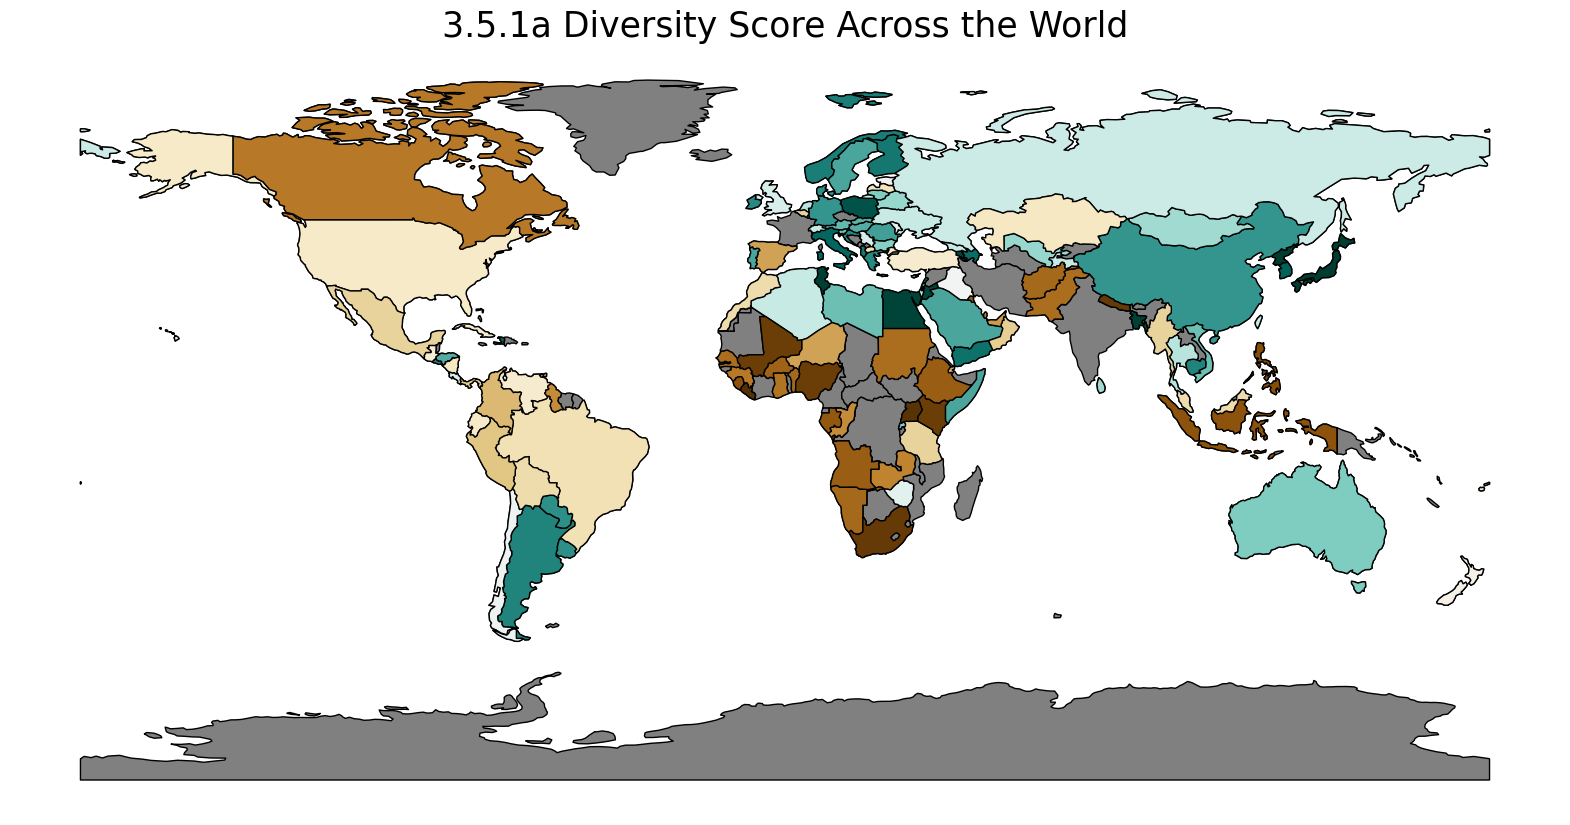

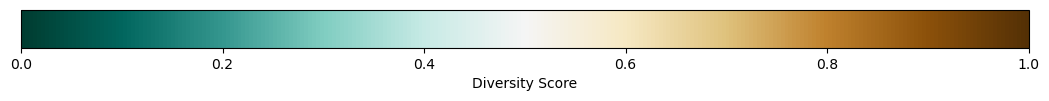

In [97]:
# start with the world map layer
fig, gax = plt.subplots(figsize=(20,10))
world.plot(ax=gax, edgecolor='black',color='gray')

# then we map the colour of polarization score
merged_diver_polar.plot(
    ax=gax, edgecolor='black', column="Racial Diversity", legend=False, cmap='BrBG_r',
)

plt.title('3.5.1a Diversity Score Across the World', fontsize = 25)
plt.axis('off')

# we now create a colorbar
fig, ax = plt.subplots(figsize=(13, 1))
fig.subplots_adjust(bottom=0.5)

cmap = 'BrBG_r'
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Diversity Score')
# end of colorbar

plt.show()


To first see how graphically the diversity score represents, I drew a world map. Please note that missing observations are filled with colour gray. I did not fill the missing observation with red or black, because gray gives the best overall visualization.

The above map shows the diversity level across different countries. As the map suggests, most Asian countries and European countries are not much diversified, while most North American countries and African countries seem to be very diverse. The reason could be that the culture in Europe and Asia is less open or simply because the immigration policies are more strict than those in North America and Africa.

We can compare this map with the previous map on the polarization score. It's easy to find out that the yellow countries(more diversified) in this map are pink countries(more polarized) in the polarization map. Thus, there might be a relationship such that people are more polarized in more diversified countries. This phenomenon seemed contradictory to our intuition - I thought people in diversified countries should be less polarized, meaning more open-minded and inclusive.

However, a map is not enough to draw such solid conclusions. Therefore, I will now draw a scatter plot with a trend line to see if this relationship actually exists.

### 3.5.2 Relationship between Diversity Score and Polarization Score (X and Y)

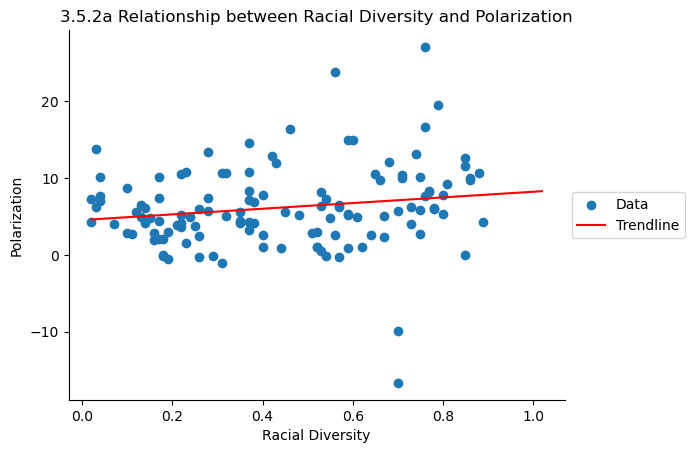

In [62]:
# Sort the merged_diver_polar dataframe by the "Racial Diversity" column
merged_diver_polar = merged_diver_polar.sort_values(by='Racial Diversity')

# Convert the "Racial Diversity" and "polarization" columns to a numeric data type
merged_diver_polar['Racial Diversity'] = pd.to_numeric(merged_diver_polar['Racial Diversity'], errors='coerce')
merged_diver_polar['polarization'] = pd.to_numeric(merged_diver_polar['polarization'], errors='coerce')

# Drop any rows with missing values
merged_diver_polar = merged_diver_polar.dropna()

# Create a scatter plot using the sorted data
plt.scatter(merged_diver_polar['Racial Diversity'], merged_diver_polar['polarization'], label='Data')

# Add labels and title
plt.xlabel('Racial Diversity')
plt.ylabel('Polarization')
plt.title('3.5.2a Relationship between Racial Diversity and Polarization')

# Add trend line
coefficients = np.polyfit(merged_diver_polar['Racial Diversity'], merged_diver_polar['polarization'], 1)
trendline_x = np.arange(min(merged_diver_polar['Racial Diversity']), max(merged_diver_polar['Racial Diversity']) + 1)
trendline_y = coefficients[0] * trendline_x + coefficients[1]
plt.plot(trendline_x, trendline_y, label='Trendline', color='red')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the graph
plt.show()

Thus, from both the map and this scatter plot, there seems to be a relationship such that people are more polarized in more diversified countries. Again, this phenomenon seemed contradictory to our intuition - people in diversified countries should be less polarized because those who live in more diversified countries should be more open-minded, inclusive and less opinionated.

The potential qualitative reasoning behind this could be the cultural conflict. Because in more diversified countries, people have different backgrounds and cultures. In some cases, especially for political elections, those cultures might lead to different ways of thinking - thus, different conclusions. When there is disagreement among some cultures, opinionated debates tend to grow. People argue to prove their way of thinking is of the right logistics. When people get more opinionated and less welcoming, they score a higher polarization score. To contrast, those who live in less diverse countries, people have the same culture and the same way of thinking. Their living habits and conventions are almost alike. Thus, disagreements, arguments, fights and debates are less likely to happen in less diversified countries, so those people will score lower on their polarization level.

Therefore, in this scenario, it makes sense that people in more diversified countries, such as Canada, and the US, are likely to be more polarized and opinionated than those who live in less diversified countries, such as Japan, China and the UK.

## 3.6 Adding a New Dataset

I will now add another new dataset to explore how the level of education influences the geographical distribution of the polarization score. The education variable is a good indicator of people's level of critical thinking. Thus, a good question to think about in this case is that is more educated areas tend to be more or less polarized. For this variable, we expect siginificant and predictive effects on the polarization score. Thus, this variable is important to the main message and the research question. Intuitively, more educated people living in the developed area should be less opinionated as they 

In this case, I will do the analysis based on the US states to better control for cultural differences.

### 3.6.1 The New Dataset

In the below codes, I am going to download the US 2020-2021 population data in each state. Using this dataset, with the dataset we already have(X: state, Y: polarization score), I will be able to find out how the populaiton is connected to the population data. Again, I am using the United States data but not the world data just to control factors like cultural diversity and living environment.

In [63]:
# because we already went into web scraping above, I am going to speed up a bit here by saving some details
edu_web_url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment"
edu_response = requests.get(edu_web_url)
edu_sorted_soup = BeautifulSoup(edu_response.content)
edu_all_data = edu_sorted_soup.find_all('table', 'wikitable sortable mw-datatable static-row-numbers')[0]
edu_all_val = edu_all_data.find_all('tr')
# now use a loop to scrape
# Create an empty dataframe
edu_df = pd.DataFrame(columns = ['State', 'Population of 25 years plus', \
                                    'High School and Higher Population','High School and Higher Percentage',\
                                   'Bachelor and Higher Pop', 'Bachelor and Higher Percentage','Advanced Degree Pop',\
                                   'Advanced Degree Percentage'])
ix = 0 # Initialise index to zero
for row in edu_all_val[3:]:
    val = row.find_all('td') # Extract all elements with tag <td>
    # Check that val has at least 4 elements before accessing its elements
    if len(val) >= 4:
        # Pick only the text part from the <td> tag
        a = val[0].text.strip()
        b = val[1].text.strip()
        c = val[2].text.strip()
        d = val[3].text.strip()
        d = d.strip('%')
        d = float(d)/100
        d = round(d,2)
        e = val[4].text.strip()
        f = val[5].text.strip()
        g = val[6].text.strip()
        h = val[7].text.strip()

        edu_df.loc[ix] = [a,b,c,d,e,f,g,h] # Store it in the dataframe as a row
        ix += 1

# Print the dataframe
edu_df.head()

,State,Population of 25 years plus,High School and Higher Population,High School and Higher Percentage,Bachelor and Higher Pop,Bachelor and Higher Percentage,Advanced Degree Pop,Advanced Degree Percentage
0,Alabama,"3,451,208","3,034,741",0.88,"946,766",27.43%,"374,490",10.85%
1,Alaska,"485,779","453,289",0.93,"159,290",32.79%,"57,868",11.91%
2,Arizona,"4,980,297","4,430,934",0.89,"1,615,081",32.43%,"629,408",12.64%
3,Arkansas,"2,037,763","1,806,873",0.89,"515,034",25.27%,"190,897",9.37%
4,California,"26,909,869","22,724,990",0.84,"9,737,817",36.19%,"3,779,787",14.05%


### 3.6.2 Merging the New Dataset

Now I merge this dataset with the exisiting cleaned dataset of polarization score.

###### Again, instead of outer merger, I chose to inner merge
In this case, the unit of observation is a state. Thus, each state should have an X(education) and a Y(polarization score). It would be meaningless to keep only either the X or Y data but no identifier variable. Single data point are useless for further exploration of X and Y relationships. Thus, it will not make sense to outer merge the data. Instead, the best way to merge this dataset is to inner merge.

In [64]:
merged_edu_polar = pd.merge(merge_state_map, edu_df, left_on='NAME', right_on='State', how='inner')
merged_edu_polar.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,norm_polar,Ave Registered Year,State,Population of 25 years plus,High School and Higher Population,High School and Higher Percentage,Bachelor and Higher Pop,Bachelor and Higher Percentage,Advanced Degree Pop,Advanced Degree Percentage
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",...,0.646834,2012,Alabama,"3,451,208","3,034,741",0.88,"946,766",27.43%,"374,490",10.85%
1,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",...,0.249168,2013,Arizona,"4,980,297","4,430,934",0.89,"1,615,081",32.43%,"629,408",12.64%
2,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,-0.008199,2013,Colorado,"4,044,182","3,738,208",0.92,"1,796,240",44.42%,"688,931",17.04%


In [65]:
# Check the number of observations
desc_8 = merged_edu_polar['State'].describe()
# change it to a table format using dataframe
desc_df_8 = pd.DataFrame(desc_8)
desc_df_8

,State
count,49
unique,49
top,Alabama
freq,1


There are only 49 states because I ignored Alaska for better graphing. In this case, except for Alaska, we have all the data for our graphing and visualization now.

### 3.6.3 Visualization

#### 3.6.3.1 Maping Visualization of Population (X Variable, Y Variable Individually)

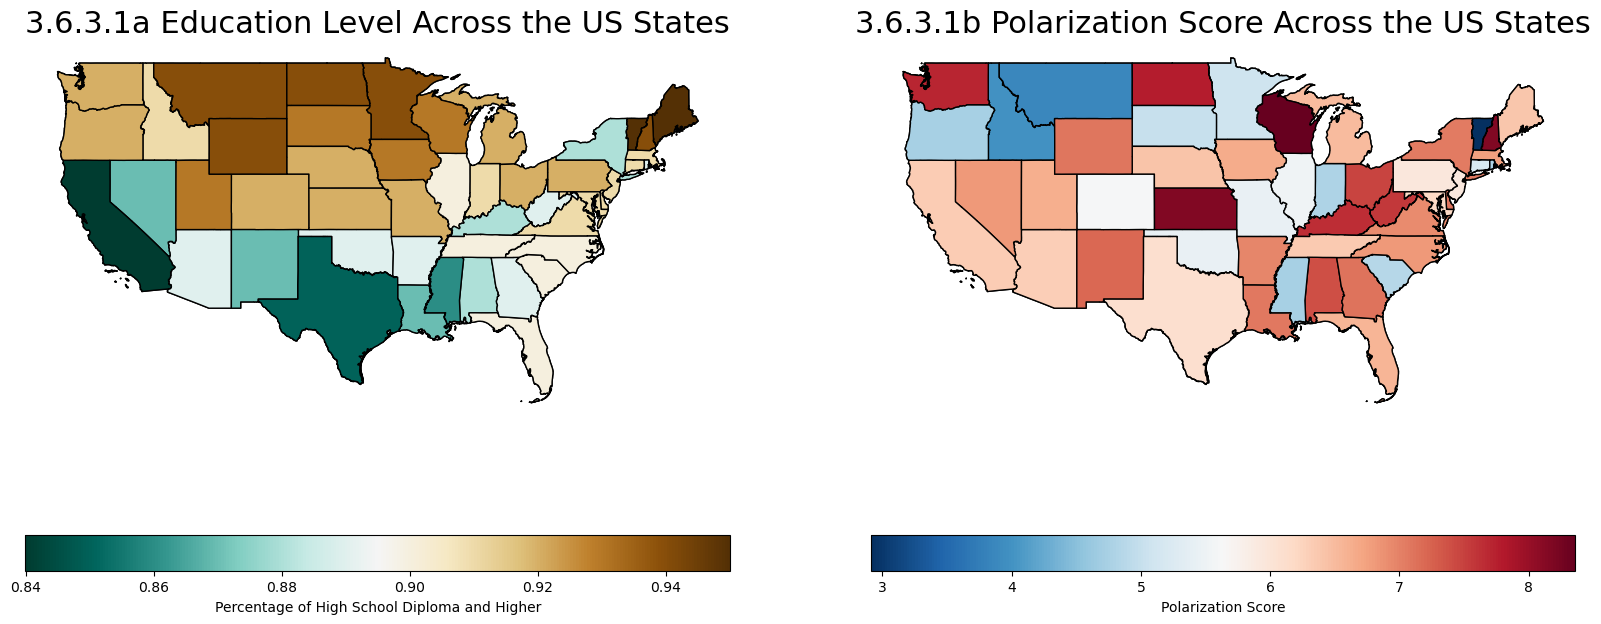

In [66]:
# now I want to draw this map with the polarization map together
# so I can see potential relationships
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# plot Ave Registered Year on the first subplot
merged_edu_polar.plot(ax=ax1, edgecolor='black', color='white')
merged_edu_polar.plot(ax=ax1, edgecolor='black', column="High School and Higher Percentage", legend=False, cmap='BrBG_r')
ax1.set_title('3.6.3.1a Education Level Across the US States', fontsize=22)
ax1.axis('off')
# plot Polarization Score on the second subplot
merge_state_map.plot(ax=ax2, edgecolor='black', color='white')
merge_state_map.plot(ax=ax2, edgecolor='black', column="Polarization Score", legend=False, cmap='RdBu_r')
ax2.set_title('3.6.3.1b Polarization Score Across the US States', fontsize=22)
ax2.axis('off')

# create a colorbar for the first map
fig.colorbar(ax1.collections[1], ax=ax1, orientation='horizontal', label='Percentage of High School Diploma and Higher')
# create a colorbar for the second map
fig.colorbar(ax2.collections[1], ax=ax2, orientation='horizontal', label='Polarization Score')
# show the plot
plt.show()

The above graph shows two US maps with different values. The one to the left has the education levels represented by the percentage of the population having a high school diploma and above. One to the right has the polarization scores calculated using tweets, as shown before in part 2.

As we can see from the two graphs, most green states to the left(low educational level) are red on the right(high polarization score). To see this pattern better, we can look at states in the south; those states are green in the left graph and red in the right graph. We can also look at the north. The blue states in the right graph are yellow in the left graph. Thus, it's likely that a higher education level will imply a lower polarization score. Economically, this pattern suggests it's likely that education level and polarity are negatively correlated. Practically and realistically, people in less educated areas tend to be more opinionated and less inclusive.

However, we also see some states that are both high in education and high in polarity. Thus, we need to draw a graph with a clearer trend in order to find out if this pattern is valid.

Thus, I will now start drawing a graph below with both X and Y variables in the same graph.

#### 3.6.3.2 Graphing Visualization of Population and Polarization Score (X and Y in the same graph)

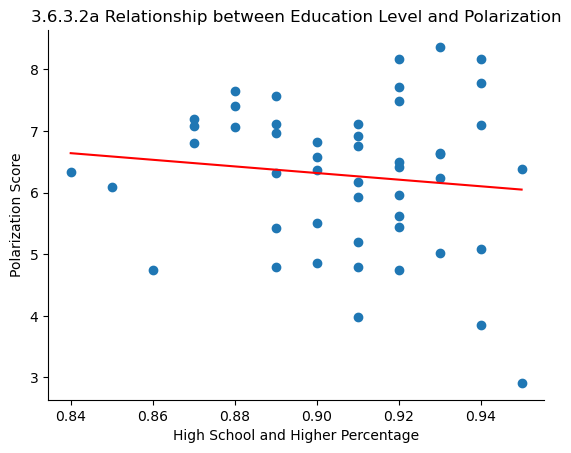

In [67]:
# Sort the merged_diver_polar dataframe by the "Racial Diversity" column
merged_edu_polar = merged_edu_polar.sort_values(by='High School and Higher Percentage')

# Convert the "Racial Diversity" and "polarization" columns to a numeric data type
merged_edu_polar['High School and Higher Percentage'] = pd.to_numeric(merged_edu_polar['High School and Higher Percentage'], errors='coerce')
merged_edu_polar['Polarization Score'] = pd.to_numeric(merged_edu_polar['Polarization Score'], errors='coerce')

# Drop any rows with missing values
merged_edu_polar = merged_edu_polar.dropna()

# Create a scatter plot using the sorted data
plt.scatter(merged_edu_polar['High School and Higher Percentage'], merged_edu_polar['Polarization Score'], label='Data')

# Add labels and title
plt.xlabel('High School and Higher Percentage')
plt.ylabel('Polarization Score')
plt.title('3.6.3.2a Relationship between Education Level and Polarization')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a trend line
x = merged_edu_polar['High School and Higher Percentage']
y = merged_edu_polar['Polarization Score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r", label='Trend line')

# Show the graph
plt.show()

The above graph shows the education level on the x-axis and the polarization score and the y-axis. Each dot corresponds to one observation, which in this case, is a state. 

From the graph, we clearly see a downward-sloping trend line. This trend line indicates that there is a negative relationship between education levels and the polarization score and thus validates our previous argument. In terms of its practical meanings, the relationship suggests that people in less educated areas tend to be more opinionated and less inclusive. This conclusion makes sense. As people get more education, their critical thinking ability hugely improves. Thus they get less judgmental and polarized.

However, the safer approach to do next would be to calculate the margin of error and do an F-test on the slope of the line - just to see if this relationship is significant.

# Part 4

## 4.1 Regressions

In the following parts, I ran four multi-regressions to show the potential causes of certain relationships we saw earlier in this paper. Particularly, the objective function for all regressions are to minimize the squared error term with the following objective function:

$$
{\min} \frac{1}{N} \sum_{i=1}^N \left(\text{Polarization Score}_i - (\beta_0 + \beta_1 \text{X}_i) \right)^2
$$


And now we start working on thoes regression models:

### 4.1.1 Regression 1 - on User Attribute

For the first regression, I am going to look at user specific attributes. This user attribute topic is important, because each individual is different in some ways. The difference in those factors can largely influence how and what a person says on inernet. Thus, a muti-regression on user attribute is needed to infer some individual-factor specific relationships to the polarization score(Y variable).

Thus, I will choose the following three variables: User join date, fans owned and In US or not.
We first look at the potential relationships between Y and the three Xs.

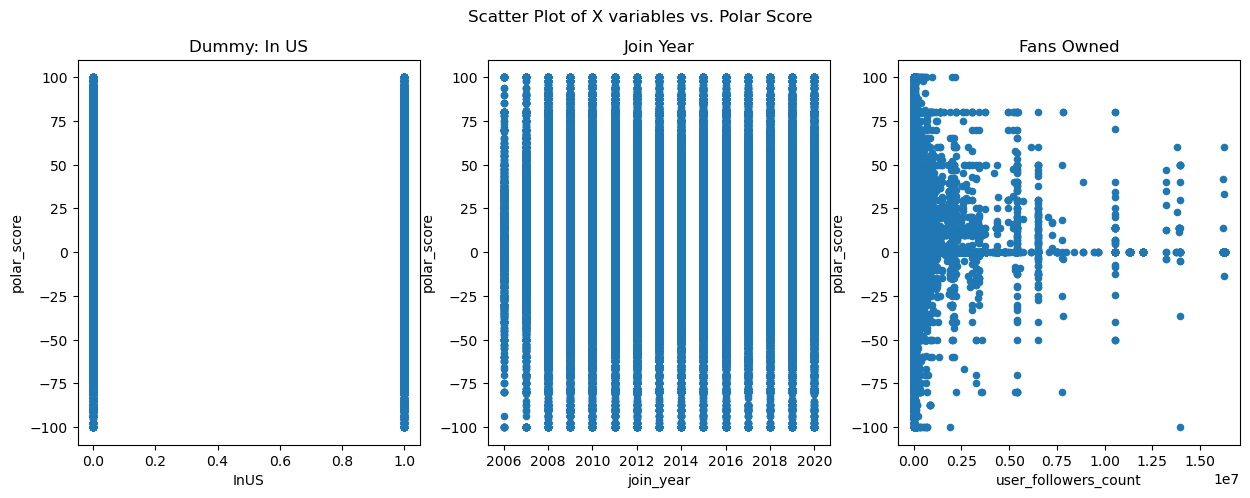

In [68]:
# Create a new dataframe for this regression
tweet_reg1 = tweet.copy()
# drop na values
tweet_reg1 = tweet_reg1[['polar_score','country','join_year','user_followers_count','tweet_id']].dropna()
# create a dummy variable for "InUS" to identify if the user is in the United States or not.
tweet_reg1['InUS'] = (tweet_reg1['country'] == 'United States of America').astype(int)
#add a constant
tweet_reg1['const'] = 1
# convert the "join_year" column to a numeric data type
tweet_reg1['join_year'] = pd.to_numeric(tweet_reg1['join_year'], errors='coerce')
# convert the "user_followers_count" column to a numeric data type
tweet_reg1['user_followers_count'] = pd.to_numeric(tweet_reg1['user_followers_count'], errors='coerce')
# convert the "InUS" column to a numeric data type
tweet_reg1['InUS'] = pd.to_numeric(tweet_reg1['InUS'], errors='coerce')
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Plot the scatter plot on the first subplot
tweet_reg1.plot(x='InUS', y='polar_score', kind='scatter', ax=ax1)
ax1.set_title('Dummy: In US')
# Plot the scatter plot on the second subplot
tweet_reg1.plot(x='join_year', y='polar_score', kind='scatter', ax=ax2)
ax2.set_title('Join Year')
# Plot the scatter plot on the third subplot
tweet_reg1.plot(x='user_followers_count', y='polar_score', kind='scatter', ax=ax3)
ax3.set_title('Fans Owned')
# Add a title for the entire figure
fig.suptitle('Scatter Plot of X variables vs. Polar Score')
# Show the plot
plt.show()

1. User join date: this variable indicates how much previous exposure the person has. Are people with more internet exposure more polarized because they are affected by regiours debates on internet or the otherwise? Join date should explain some part of Y(polarization score), becasue internet exposure usually represent people's familarities with the envrionent, and thus affect how and what they say on internet.
    Meanwhile, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Therefore, I use the intuition that internet exposure and polarization should be simply correlated. With suqared or root modifications, the interpretations won't make sense. Thus, I will assume a linear relationship in this case.
2. Fans owned: this varialbe indicates how influencial the user is on internet. Are more influencial people tend to be polarized on their tweets to attract people's attention? Fans owned should explain some part of Y(polarization score), becasue social media influence usually makes people more careful on how and what they say on internet.
    Still, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Thus, intuiatively, because it's straightforward that people with more fans have more influence. I will assume linear relationship, and with suqared or root modifications, the interpretations won't make sense.
3. In US or not: this is a dummy variable indicating whether the user is in the United States or not. This location variable can explain a bit of Y(polarization score), because we are using the 2020 US election data - so I am to dig into whether this election event affect how and what people say. Meanwhile, intuiatively, people in the US are likely to be more polarized during this time, and as we are looking globally, controling this variable is important. 
   Lastly, we should expect a linear relationship, because this is a dummy variable of 0 and 1 - squaring or modifying the variable does not make sense.

In conclusion, the regression equation will look like the following one:

$$
{PolarizationScore}_i = \beta_0 + \beta_1 \widehat{JoinDate}_i + \beta_2 \widehat{FansOwned}_i + \beta_3 \widehat{InUS}_i + u_i
$$

In [69]:
# as we already have data sorted, I will run regressions now
# now collect a list of regression variables
X1_1 = ['const','join_year']
X1_2 = ['const','join_year', 'user_followers_count']
X1_3 = ['const','join_year', 'user_followers_count', 'InUS']
reg1_1 = sm.OLS(tweet_reg1['polar_score'], tweet_reg1[X1_1], missing='drop').fit()
reg1_2 = sm.OLS(tweet_reg1['polar_score'], tweet_reg1[X1_2], missing='drop').fit()
reg1_3 = sm.OLS(tweet_reg1['polar_score'], tweet_reg1[X1_3], missing='drop').fit()
# print it using stargazer
stargazer1 = Stargazer([reg1_1,reg1_2,reg1_3])
# customize model name
stargazer1.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
# re-rank the columns so that the output looks better
stargazer1.covariate_order(['const', 'join_year', 'user_followers_count', 'InUS'])
# change the name of const column to intervept
stargazer1.rename_covariates({'const': 'Intercept'})
# see the output
HTML(stargazer1.render_html())

First, I assess the performance of this regression. The above regression results show that all three variables and one intercept are statistically significant. The P-value for these results is smaller than 0.01, meaning the probability that the null hypothesis(coefficient is 0) is true is smaller than 0.01. This result suggests that X explains part of Y, and such a relationship exists with a significantly high probability. Meanwhile, we look at the F statistic, which checks if all variables' overall relationship exists(beta1, beta2, and beta3 are all non-zero values). Usually, an F statistic bigger than three will mean the relationships are significant. In this case, the F statistic, in this case, is huge, which indicates that the overall regression is effective in identifying relationships between the X variables and the Y variable. Meanwhile, in this case, I do not care too much about the R-squared, even though they are zero. Because I have too many observations, and some Y variables have the same X number(for example, tweets in the same country will have the polar score corresponding to the same population), it would be very hard to get an R-squared that is high enough. If we insist on getting a high R-squared, I will have to control as many Xs as possible - and that would look messy and hard to interpret in this case. Thus, I am not looking into R-squared in this dataset and the regressions.

Now I interpret what the regression results mean. 
- First of all, the intercept does not have any economic meaning. Because it does not make sense to have a user who registered in year 0 - when the internet is not yet established. So I will focus on the other three variables. 
- Second, looking into the variable join_year, which indicates the user's previous internet exposure, the coefficient is slightly positive at 0.034. This result says that people with less internet exposure(join_year is bigger) tend to be more opinionated and less careful about what they say online. Concerning the research question, we would say that: the user join year can well forecast people's polarization level, so that when people have one year less of internet experience, their polarization score tends to increase, on average, by 0.034 points. 0.034 point is not economically significant considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. Again, this make sense because people who know internet well will be cautious on what they say and tend to be less polarized - so they don't become the target of attacks on the internet.
- Third, looking into the variable user_follower_count, an indicator of the user's social media influence, the coefficient is rounded to 0 with three decimal places. This result says that people's social media influence does not predict an increasing nor a decreasing trend in the polarization score. Concerning the research question, we would say that: the user followers count can well forecast people's polarization level as the coefficient is highly statistically significant; however, there doesn't seem to be a straightforward linear and numeric relationship between those two variables.
- Fourth, looking into the variable InUS, which is a dummy variable indicating whether the user is in the United States, the coefficient is positive at about 0.83. This result says that people in the US during election time tend to be more opinionated. About the research question, we would say that: using the 2020 US election data, the user location can well forecast people's polarization level so that if a user is in the US, their polarization score tends to be bigger, on average, by 0.83 points than those who are not in the US. 0.83 point is not economically significant, considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. Again, this make sense. As it's the US election, people in the US tend to be more polarized than people in elsewhere. Plus, having InUS as a variable better controls the effects for other variables.
- To sum up, this model shows that user registered time and whether the user is in the US have predictive effect on the polarization score. The prediction says that people with less internet experience and people in the US tend to be more polarized.

### 4.1.2 Regression 2 - on Tweet Attribute

For the second regression, I am going to look at tweet specific attributes. This tweet attribute topic is important, because each tweet is different in some ways. The difference in those factors can largely predict or indicate the overall social environment on the internet. Thus, a muti-regression on tweet attribute is needed to infer some tweet-specific relationships relating to the polarization score(Y variable).

Thus, I will choose the following three variables: retweet counts, likes and created day.
We first look at the potential relationships between Y and the three Xs.

In [70]:
# Create a new dataframe for this regression
tweet_reg2 = tweet.copy()
# drop na values
tweet_reg2 = tweet_reg2[['polar_score','retweet_count','likes','created_time','tweet_id']].dropna()

In [71]:
# transfer created_time into days from 2020-10-15, where 2020-10-15 is day 0
first_day = tweet_reg2['created_time'].min()
fday = first_day.date()
# now set up a loop to calculate the difference in days
tweet_reg2['created_day'] = 0
for i in range(len(tweet_reg2)):
    the_day = tweet_reg2.iloc[i,3]
    the_day = the_day.date()
    diff = the_day - fday
    tweet_reg2.iloc[i,-1] = diff.days

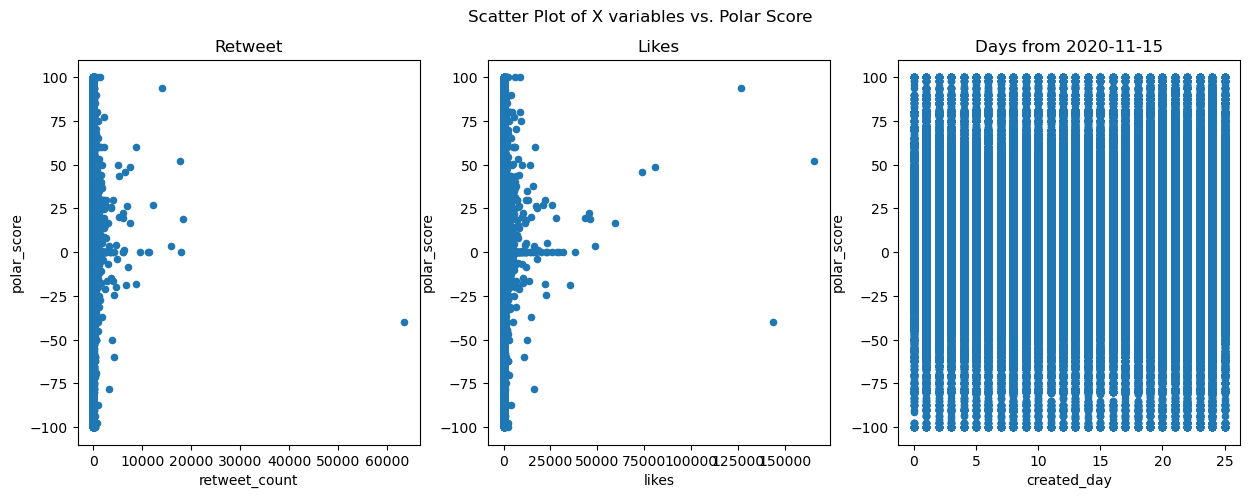

In [72]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Plot the scatter plot on the first subplot
tweet_reg2.plot(x='retweet_count', y='polar_score', kind='scatter', ax=ax1)
ax1.set_title('Retweet')
# Plot the scatter plot on the second subplot
tweet_reg2.plot(x='likes', y='polar_score', kind='scatter', ax=ax2)
ax2.set_title('Likes')
# Plot the scatter plot on the third subplot
tweet_reg2.plot(x='created_day', y='polar_score', kind='scatter', ax=ax3)
ax3.set_title('Days from 2020-11-15')
# Add a title for the entire figure
fig.suptitle('Scatter Plot of X variables vs. Polar Score')
# Show the plot
plt.show()

1. Retweet_count: this variable indicates how popular a tweet is on Twitter. The more likes a tweet has, the more popular the tweet is. Are more popular tweets tend to be polarized? Number of retweets should explain some part of Y(polarization score), becasue number of retweet is a good indicator of the overall internet environment that could affect how people think and talk on internet.
    Meanwhile, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size, and the fact that most observations lie at 0 retweet. Thus, I will assume a linear relationship in this case. With suqared or root modifications, the interpretations won't make sense(squared number of retweets does not make sense).
2. Likes: this varialbe is very similar to the retweet count, but the likes show a broader affect because it's easier for people to like a post than to retweet one(mentally, you would only retweet a tweet if you strong idenfity with it, while likes occur lower mental efforts). This variables indicates how popular a tweet is on Twitter. Again, the number of likes should explain some part of Y(polarization score), becasue number of likes is a good indicator of the overall internet environment that could affect how people think and talk on internet.
    We will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size, and the fact that most observations lie at 0 like. Thus, I will assume linear relationship, and with suqared or root modifications, the interpretations won't make sense(squared number of lieks does not make sense).
3. Created_day: this is a variable indicating how close it is to the US election, the bigger the number, the closer it is. This day count variable can explain a bit of Y(polarization score), because we are using the 2020 US election data - so I am to dig into whether this time sensitive issue affect how and what people say. Meanwhile, intuiatively, people are likely to be more polarized when it gets closer to the election as debates evolve.
   Still, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Thus, intuiatively, because it's straightforward that closer to the election, people get more polarized. I will assume linear relationship, and with suqared or root modifications, the interpretations won't make sense.

In conclusion, the regression equation will look like the following one:

$$
{PolarizationScore}_i = \beta_0 + \beta_1 \widehat{ReTweet}_i + \beta_2 \widehat{Likes}_i + \beta_3 \widehat{CreatedTime}_i + u_i
$$

In [73]:
#add a constant
tweet_reg2['const'] = 1
# now collect a list of regression variables
X2_1 = ['const','retweet_count']
X2_2 = ['const','retweet_count','likes']
X2_3 = ['const','retweet_count','likes','created_day']
reg2_1 = sm.OLS(tweet_reg2['polar_score'], tweet_reg2[X2_1], missing='drop').fit()
reg2_2 = sm.OLS(tweet_reg2['polar_score'], tweet_reg2[X2_2], missing='drop').fit()
reg2_3 = sm.OLS(tweet_reg2['polar_score'], tweet_reg2[X2_3], missing='drop').fit()
# print it using stargazer
stargazer2 = Stargazer([reg2_1,reg2_2,reg2_3])
# customize model name
stargazer2.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
# re-rank the columns so that the output looks better
stargazer2.covariate_order(['const','retweet_count','likes','created_day'])
# change the name of const column to intervept
stargazer2.rename_covariates({'const': 'Intercept'})
# see the output
HTML(stargazer2.render_html())

First, I assess the performance of this regression. The above regression results show that all three variables and one intercept are statistically significant. The P-value for these results is smaller than 0.01, meaning the probability that the null hypothesis(coefficient is 0) is true is smaller than 0.01. This result suggests that X explains part of Y, and such a relationship exists with a significantly high probability. Meanwhile, we look at the F statistic, which checks if all variables' overall relationship exists(beta1, beta2, and beta3 are all non-zero values). Usually, an F statistic bigger than three will mean the relationships are significant. In this case, the F statistic, in this case, is huge, which indicates that the overall regression is effective in identifying relationships between the X variables and the Y variable. Meanwhile, in this case, I do not care too much about the R-squared, even though they are zero. Because I have too many observations, and some Y variables have the same X number(for example, tweets in the same country will have the polar score corresponding to the same population), it would be very hard to get an R-squared that is high enough. If we insist on getting a high R-squared, I will have to control as many Xs as possible - and that would look messy and hard to interpret in this case. Thus, I am not looking into R-squared in this dataset and the regressions.

Now I interpret what the regression results mean. 
- first of all, the intercept represents the average polarization score for tweets sent on 2020-11-15 with zero likes and zero retweets. This intercept gives us an understanding of the overall internet atmosphere as a baseline. The intercept has a highly statically significant polarization score of 2.735.
- Second, looking into the variable retweet count, which indicates the popularity of a tweet, the coefficient is slightly negative at -0.002. This result says that tweets that are more popular tend to be less opinionated and more inclusive. Concerning the research question, we would say that: the retweet counts can well forecast the polarization level of the tweet, so that when the number of retweets goes up, the polarization score of the tweet tends to decrease, on average, by 0.002 points. 0.002 point is not economically significant considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. This result will suggest that popular contents on Twitter are more polarized, which aliens with our previous conclusions.
- Third, looking into the variable number of likes, a broader indicator of the popularity of a tweet comparing to variable "retweet number," the coefficient is rounded to 0 with two decimal places. This result is not surprising as it's range of measure is in nature broader than retweet counts. These zero coefficients says that people have different tastes regard to the content they see on internet, so number of likes does not show increasing or decreasing trend in the polarization score. Concerning the research question, we would say that: the number of likes can well forecast people's polarization level as the coefficient is highly statistically significant; however, there doesn't seem to be a straightforward linear and numeric relationship between those two variables.
- Fourth, looking into the variable created day, which indicates how close it is to the US election: the higher the number is, the closer it is to the US election. The coefficient is positive at about 0.17. This result says that the closer it is to the US election, people tend to be more opinionated. About the research question, we would say that: using the 2020 US election data, the time to election can well forecast people's polarization level so that if when it gets one day closer to the election, people's polarization score tends to be bigger, on average, by 0.17 points. 0.17 point is not economically significant, considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. Again, intuitively this makes sense. Ad it gets closer to the election date, more arguments and debates tend to show up, raising the polarization score.
- To sum up, this model shows that number of retweets and the twitter created day to the election have predictive effect on the polarization score. The prediction says that tweets of more retweets tend to be less polarized, and the time closer to an election event makes people more polarized.

### 4.1.3 Regression 3 - on Education

For the third regression, I am going to look at educational attributes. This education attribute topic is important, because levels of education largely affects and determines how a person talks and behaves. The difference in the levels of education can largely predict or indicate the overall polarization scores as well. Thus, a muti-regression on education attribute is needed to infer some relationships to the polarization score(Y variable).

Thus, I will choose the following three variables: High School and Higher Percentage, Bachelor and Higher Percentage, and Advanced Degree Percentage.
We first look at the potential relationships between Y and the three Xs.

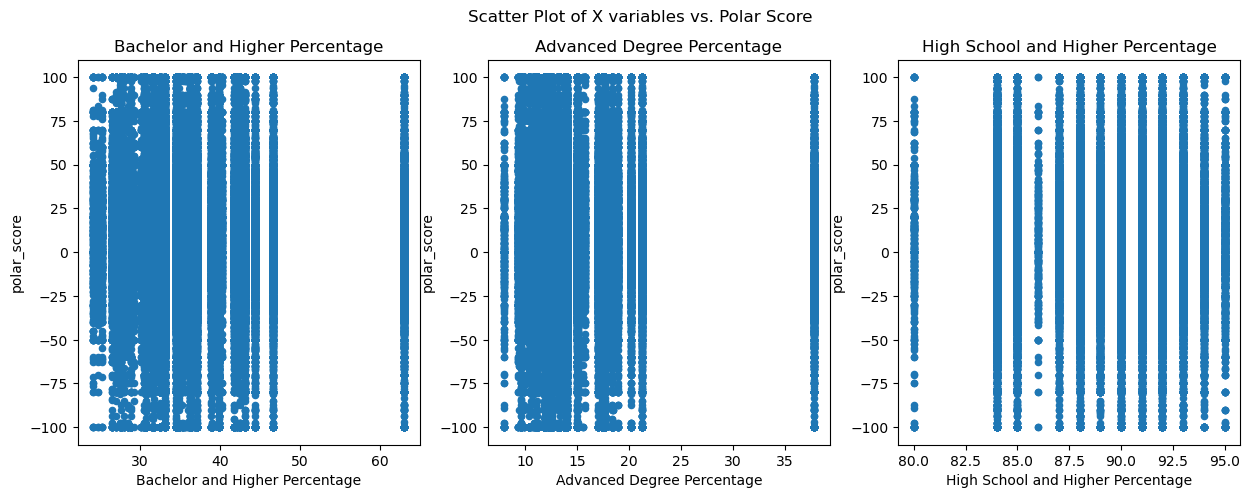

In [74]:
# first merge the dataset, as I have all the data I need from previous parts
tweet_reg3 = tweet.copy()
reg3_merged_df = pd.merge(edu_df, tweet_reg3, left_on='State', right_on='state')
# clean the percentgaes so they are in float format
reg3_merged_df['Bachelor and Higher Percentage'] = reg3_merged_df['Bachelor and Higher Percentage'].str.rstrip('%').astype(float)
reg3_merged_df['Advanced Degree Percentage'] = reg3_merged_df['Advanced Degree Percentage'].str.rstrip('%').astype(float)
reg3_merged_df['High School and Higher Percentage'] = reg3_merged_df['High School and Higher Percentage']*100
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Plot the scatter plot on the first subplot
reg3_merged_df.plot(x='Bachelor and Higher Percentage', y='polar_score', kind='scatter', ax=ax1)
ax1.set_title('Bachelor and Higher Percentage')
# Plot the scatter plot on the second subplot
reg3_merged_df.plot(x='Advanced Degree Percentage', y='polar_score', kind='scatter', ax=ax2)
ax2.set_title('Advanced Degree Percentage')
# Plot the scatter plot on the third subplot
reg3_merged_df.plot(x='High School and Higher Percentage', y='polar_score', kind='scatter', ax=ax3)
ax3.set_title('High School and Higher Percentage')
# Add a title for the entire figure
fig.suptitle('Scatter Plot of X variables vs. Polar Score')
# Show the plot
plt.show()

Becasue all these three variables all represent the education level, so I will explain them all together.

'High School and Higher Percentage','Bachelor and Higher Percentage' and 'Advanced Degree Percentage': all these variables indicate the levels of education. Intuiatively, the higher the education level is, the less polarized the tweet is sent by those people. But is this relationship emperically true? Levels of education should explain some part of Y(polarization score), becasue levels of education largely affects and determines how a person talks and behaves.

Meanwhile, we will assume a linear relationship for all those three variables. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size, and the fact that most observations lie acorss different percentages from -100 to 100 in polarization scores. Thus, I will assume a linear relationship in this case. With suqared or root modifications, the interpretations won't make sense(squared percentage of education does not make sense).

In conclusion, the regression equation will look like the following one:

$$
{PolarizationScore}_i = \beta_0 + \beta_1 \widehat{HighSchoolPct}_i + \beta_1 \widehat{BachelorPct}_i + \beta_1 \widehat{AdvancedPct}_i + u_i
$$

In [75]:
# now I start running regressions
#add a constant
reg3_merged_df['const'] = 1
# now collect a list of regression variables
X3_1 = ['const','High School and Higher Percentage']
X3_2 = ['const','High School and Higher Percentage','Bachelor and Higher Percentage']
X3_3 = ['const','High School and Higher Percentage','Bachelor and Higher Percentage','Advanced Degree Percentage']
reg3_1 = sm.OLS(reg3_merged_df['polar_score'], reg3_merged_df[X3_1], missing='drop').fit()
reg3_2 = sm.OLS(reg3_merged_df['polar_score'], reg3_merged_df[X3_2], missing='drop').fit()
reg3_3 = sm.OLS(reg3_merged_df['polar_score'], reg3_merged_df[X3_3], missing='drop').fit()
# print it using stargazer
stargazer3 = Stargazer([reg3_1,reg3_2,reg3_3])
# customize model name
stargazer3.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
# re-rank the columns so that the output looks better
stargazer3.covariate_order(['const','High School and Higher Percentage','Bachelor and Higher Percentage','Advanced Degree Percentage'])
# change the name of const column to intervept
stargazer3.rename_covariates({'const': 'Intercept'})
# see the output
HTML(stargazer3.render_html())

First, I assess the performance of this regression. The above regression results show that all three variables and one intercept are statistically significant. The P-value for these results is smaller than 0.01, meaning the probability that the null hypothesis(coefficient is 0) is true is smaller than 0.01. This result suggests that X explains part of Y, and such a relationship exists with a significantly high probability. Meanwhile, we look at the F statistic, which checks if all variables' overall relationship exists(beta1, beta2, and beta3 are all non-zero values). Usually, an F statistic bigger than three will mean the relationships are significant. In this case, the F statistic, in this case, is huge, which indicates that the overall regression is effective in identifying relationships between the X variables and the Y variable. Meanwhile, in this case, I do not care too much about the R-squared, even though they are zero. Because I have too many observations, and some Y variables have the same X number(for example, tweets in the same country will have the polar score corresponding to the same population), it would be very hard to get an R-squared that is high enough. If we insist on getting a high R-squared, I will have to control as many Xs as possible - and that would look messy and hard to interpret in this case. Thus, I am not looking into R-squared in this dataset and the regressions.

Now I interpret what the regression results mean. 
- First of all, the intercept does not have any economic meaning. Because it does not make sense to have a country that has percentage of high school education equals 0- at least some one in the country is somewhat educated. So, I will focus on the other three variables. 
- Second, looking into the variable High School and Higher Percentage, which indicates the user's basic education level, the coefficient is slightly negative at -0.014. This result says that countries with more educated people tend to be less opinionated. And thus, to refer that more educated people tend to be more open and inclusive on what they say. Concerning the research question, we would say that: the percentage of people having high school diploma can well forecast a country's polarization level, so that when the percentage of high school diploma increase by one percentage point, the countries polarization score tends to decrease, on average, by 0.014 points. 0.014 point is not economically significant considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. 
- Third, looking into the variable Bachelor and Higher Percentage, which indicates the user's intermediate education level, the coefficient is slightly negative at -0.108. This result says that countries with more educated people tend to be less opinionated. And thus, to refer that more educated people tend to be more open and inclusive on what they say. Concerning the research question, we would say that: the percentage of people having high school diploma can well forecast a country's polarization level, so that when the percentage of bachelor's degree increase by one percentage point, the countries polarization score tends to decrease, on average, by 0.108 points. 0.108 point is not economically significant considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. Notice that comparing to percentage of bachelor's degree, percentage of bachelor diploma has a larger negative effect on the Y variable. Thus, people who get higher education tend to be more careful and less judgmental on what they say. This result makes sense because people are trained to think critically and be more inclusive in the higher education environment.
- Fourth, looking into the variable High School and Higher Percentage, which indicates the user's advanced education level, the coefficient is slightly positive at 0.137. This result says that countries with more educated people tend to be more opinionated. And thus, to refer that more educated people tend to be less open and inclusive on what they say. Concerning the research question, we would say that: the percentage of people having advanced degrees can well forecast a country's polarization level, so that when the percentage of advanced degrees increase by one percentage point, the countries polarization score tends to increase, on average, by 0.137 points. 0.137 point is not economically significant considering the base range of polarization score is from -100 to 100, but this number is highly statistically significant. Notice that this conclusion contradicts to what we inferred from high school and bachelor's degree diploma. This could imply that people with advanced degree tends to be more confidence and sure of what they say - thus, they tend to be less open and more polarized.
- To sum up, this model shows that education levels have predictive effect on the polarization score. The prediction says that people of high school and bachelor's degrees tend to be less polarized, and people of more advanced degree tend to be more polarized.

### 4.1.4 Regression 4 - on General Economic Attribute

For the last regression, I am going to look at general economic attributes. These economic attributes are important, because economic conditions sometimes determine not only the environment that people live in but also determine how people think and talk. The difference in those factors can largely predict or indicate the overall people's polarization. Thus, a muti-regression on the general economic variables is needed to infer some economic-specific relationships relating to the polarization score(Y variable).

Thus, I will choose the following three variables: Population, GDP Estimate, Racial Diversity.
We first look at the potential relationships between Y and the three Xs.

In [76]:
# first scrape Income data
# because we already went into web scraping above, I am going to speed up a bit here by saving some details
inc_web_url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita"
inc_response = requests.get(inc_web_url)
inc_sorted_soup = BeautifulSoup(inc_response.content)
inc_all_data = inc_sorted_soup.find_all('table', 'wikitable sortable static-row-numbers plainrowheaders srn-white-background')[0]
inc_all_val = inc_all_data.find_all('tr')
# now use a loop to scrape
# Create an empty dataframe
inc_df = pd.DataFrame(columns = ['Country', 'UN Region', \
                                    'GDP Estimate','Year'])
ix = 0 # Initialise index to zero
for row in inc_all_val[2:]:
    val = row.find_all('td') # Extract all elements with tag <td>
        # Pick only the text part from the <td> tag
    a = val[0].text.strip().strip('*')
    b = val[1].text.strip()
    c = val[-2].text.strip()
    d = val[-1].text.strip()

    inc_df.loc[ix] = [a,b,c,d] # Store it in the dataframe as a row
    ix += 1

# get the 3-letter code for merging
inc_df['Country_Code'] = ''
for i in range(len(inc_df)):
    name = inc_df.iloc[i,0]
    try:
        country = pycountry.countries.search_fuzzy(name)[0]
        inc_df.iloc[i,-1] = country.alpha_3
    except LookupError:
        pass 
inc_df.drop(inc_df[inc_df['Country_Code'] == ''].index, inplace=True)
inc_df.head()

,Country,UN Region,GDP Estimate,Year,Country_Code
0,Luxembourg,Europe,"115,700",2021,LUX
1,Liechtenstein,Europe,"139,100",2009,LIE
2,Singapore,Asia,"106,000",2021,SGP
3,Ireland,Europe,"102,500",2021,IRL
4,Monaco,Europe,"115,700",2015,MCO


In [77]:
# then scrape population data
# because we already went into web scraping above, I am going to speed up a bit here by saving some details
pop_web_url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
pop_response = requests.get(pop_web_url)
pop_sorted_soup = BeautifulSoup(pop_response.content)
pop_all_data = pop_sorted_soup.find_all('table', 'wikitable sortable')[0]
pop_all_val = pop_all_data.find_all('tr')
# now use a loop to scrape
# Create an empty dataframe
pop_df = pd.DataFrame(columns = ['Country', 'Population', \
                                    'Date','Source'])
ix = 0 # Initialise index to zero
for row in pop_all_val[3:]:
    val = row.find_all('td') # Extract all elements with tag <td>
        # Pick only the text part from the <td> tag
    a = val[0].text.strip()
    b = val[1].text.strip()
    c = val[3].text.strip()
    d = val[4].text.strip()

    pop_df.loc[ix] = [a,b,c,d] # Store it in the dataframe as a row
    ix += 1

# get the 3-letter code for merging
pop_df['Country_Code'] = ''
for i in range(len(pop_df)):
    name = pop_df.iloc[i,0]
    try:
        country = pycountry.countries.search_fuzzy(name)[0]
        pop_df.iloc[i,-1] = country.alpha_3
    except LookupError:
        pass
pop_df.drop(pop_df[pop_df['Country_Code'] == ''].index, inplace=True)
pop_df.head()

,Country,Population,Date,Source,Country_Code
0,China,"1,411,750,000",31 Dec 2022,Official estimate[4],CHN
1,India,"1,392,329,000",1 Mar 2023,Official projection[5],IND
2,United States,"334,596,000",8 Apr 2023,National population clock[6],USA
3,Indonesia,"275,773,800",1 Jul 2022,Official estimate[7],IDN
4,Pakistan,"235,825,000",1 Jul 2022,UN projection[3],PAK


In [78]:
# then merge them, diversity, population and gdp
reg4_merged_df = pd.merge(inc_df, pop_df, on='Country_Code',how='inner')
reg4_merged_df = pd.merge(reg4_merged_df, diver_df, left_on='Country_Code', right_on='Country_Code')
reg4_merged_df.set_index('Country', inplace=True)
# now I modify the GDP and population so that they are float
reg4_merged_df['Population'] = reg4_merged_df['Population'].str.replace(',', '').astype(float)
reg4_merged_df['GDP Estimate'] = reg4_merged_df['GDP Estimate'].str.replace(',', '').astype(float)
reg4_merged_df.head(3)

,Country_x,UN Region,GDP Estimate,Year,Country_Code,Country_y,Population,Date,Source,Racial Diversity,Non_religious_rate,Christian_rate,Cultural_west
Country,,,,,,,,,,,,,
Singapore,Singapore,Asia,106000.0,2021,SGP,Singapore,5453600.0,30 Jun 2021,Official estimate[112],0.40,16.5%,17.7%,No
Ireland,Ireland,Europe,102500.0,2021,IRL,Ireland,5123536.0,3 Apr 2022,2022 census preliminary results[116],0.17,7.9%,89.7%,Yes
Qatar,Qatar,Asia,92200.0,2021,QAT,Qatar,2799202.0,31 Jul 2019,Official estimate[132],0.71,1%,13.7%,No


In [79]:
tweet_reg4 = tweet.copy()
tweet_reg4['country'] = tweet_reg4['country'].replace('United States', 'United States of America')
reg4_merged_df = pd.merge(reg4_merged_df, tweet_reg4, left_on='Country_y', right_on='country')
reg4_merged_df.head(3)

,Country_x,UN Region,GDP Estimate,Year,Country_Code,Country_y,Population,Date,Source,Racial Diversity,...,country,continent,state,state_code,collected_at,hashtag,created_time,join_year,other_hash,polar_score
0,Singapore,Asia,106000.0,2021,SGP,Singapore,5453600.0,30 Jun 2021,Official estimate[112],0.4,...,Singapore,Asia,NaN,NaN,2020-10-21 00:11:36.795262223,trump,2020-10-15,2012,#TRUMP,0.0
1,Singapore,Asia,106000.0,2021,SGP,Singapore,5453600.0,30 Jun 2021,Official estimate[112],0.4,...,Singapore,Asia,NaN,NaN,2020-10-21 00:24:45.775007451,trump,2020-10-15,2011,#LINDSEYGRAHAM #TRUMP #GOPCOMPLICITTRAITORS #J...,40.0
2,Singapore,Asia,106000.0,2021,SGP,Singapore,5453600.0,30 Jun 2021,Official estimate[112],0.4,...,Singapore,Asia,NaN,NaN,2020-10-21 00:43:10.122720852,trump,2020-10-15,2008,#TRUMP,0.0


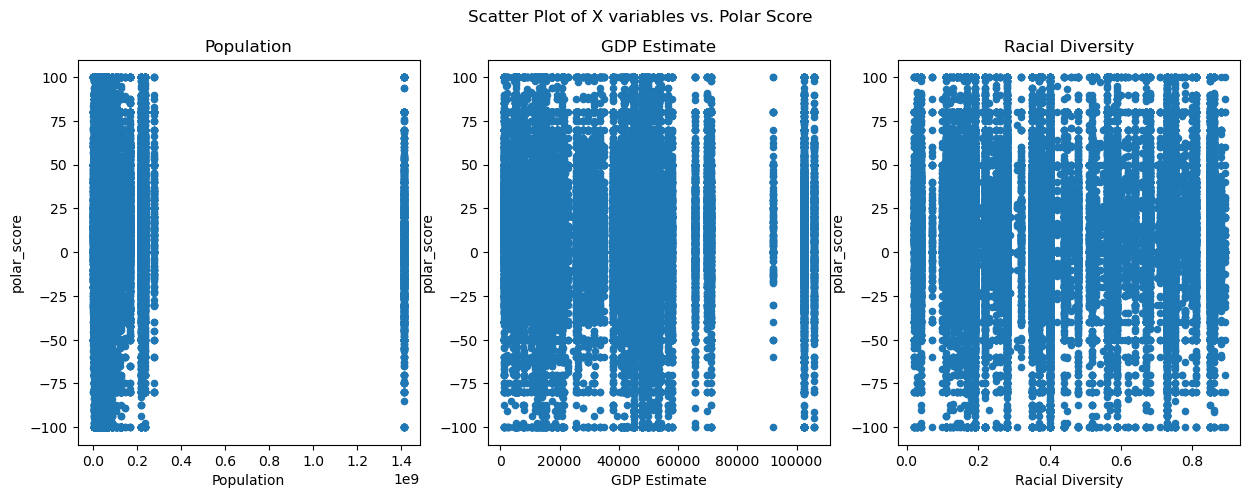

In [80]:
# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Plot the scatter plot on the first subplot
reg4_merged_df.plot(x='Population', y='polar_score', kind='scatter', ax=ax1)
ax1.set_title('Population')
# Plot the scatter plot on the second subplot
reg4_merged_df.plot(x='GDP Estimate', y='polar_score', kind='scatter', ax=ax2)
ax2.set_title('GDP Estimate')
# Plot the scatter plot on the third subplot
reg4_merged_df.plot(x='Racial Diversity', y='polar_score', kind='scatter', ax=ax3)
ax3.set_title('Racial Diversity')
# Add a title for the entire figure
fig.suptitle('Scatter Plot of X variables vs. Polar Score')
# Show the plot
plt.show()

1. Population: this variable indicates how many people are in a country, and then correlating the number of population to the polarization score according to the country. With a higher population, the country tends to be more corwded and more complex. Are people living in more corwded countries tend to be more polarized? Population should explain some part of Y(polarization score), becasue population is a good indicator of the overall real life living environment that could affect how people think and talk.
    Meanwhile, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Thus, I will assume a linear relationship in this case. With suqared or root modifications, the interpretations won't make sense(squared number of population does not make sense).
2. GDP Estimate: this varialbe indicates people's income and welfare in a country, and then correlating the number of GDP to the polarization score according to the country. With a higher GDP, the country tends to be richer and more developed. Are people living in more developed and richer countries tend to be more polarized? GDP should explain some part of Y(polarization score), becasue GDP is also a good indicator of the overall real life living environment that could affect how people think and talk.
    We will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Thus, I will assume linear relationship, and with suqared or root modifications, the interpretations won't make sense(squared number of GDP does not make sense).
3. Racial Diversiy: this is a variable indicating the level of diversity within a country, the bigger the number, the more diverse the country is. Diversity score can explain a bit of Y(polarization score), because we expect people living in more diversed countries tend to more open and thus less polarized.
   Still, we will assume a linear relationship. When looking at the scatter plot above, it's very hard to identify a clear relationship because of the huge sample size. Thus, I will assume linear relationship, and with suqared or root modifications, the interpretations won't make sense(squared number of diversity level does not make sense).

In conclusion, the regression equation will look like the following one:

$$
{PolarizationScore}_i = \beta_0 + \beta_1 \widehat{Population}_i + \beta_2 \widehat{GDPpcPPP}_i + \beta_3 \widehat{DiversityScore}_i + u_i
$$

In [81]:
# now start with the regression
# add a constant
reg4_merged_df['const'] = 1
# now collect a list of regression variables
X4_1 = ['const','Population']
X4_2 = ['const','Population', 'GDP Estimate']
X4_3 = ['const','Population', 'GDP Estimate', 'Racial Diversity']
reg4_1 = sm.OLS(reg4_merged_df['polar_score'], reg4_merged_df[X4_1], missing='drop').fit()
reg4_2 = sm.OLS(reg4_merged_df['polar_score'], reg4_merged_df[X4_2], missing='drop').fit()
reg4_3 = sm.OLS(reg4_merged_df['polar_score'], reg4_merged_df[X4_3], missing='drop').fit()
# print it using stargazer
stargazer4 = Stargazer([reg4_1,reg4_2,reg4_3])
# customize model name
stargazer4.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
# re-rank the columns so that the output looks better
stargazer4.covariate_order(['const','Population', 'GDP Estimate', 'Racial Diversity'])
# change the name of const column to intervept
stargazer4.rename_covariates({'const': 'Intercept'})
# see the output
HTML(stargazer4.render_html())

First, I assess the performance of this regression. The above regression results show that all three variables and one intercept are statistically significant. The P-value for these results is smaller than 0.01, meaning the probability that the null hypothesis(coefficient is 0) is true is smaller than 0.01. This result suggests that X explains part of Y, and such a relationship exists with a significantly high probability. Meanwhile, we look at the F statistic, which checks if all variables' overall relationship exists(beta1, beta2, and beta3 are all non-zero values). Usually, an F statistic bigger than three will mean the relationships are significant. In this case, the F statistic, in this case, is huge, which indicates that the overall regression is effective in identifying relationships between the X variables and the Y variable. Meanwhile, in this case, I do not care too much about the R-squared, even though they are zero. Because I have too many observations, and some Y variables have the same X number(for example, tweets in the same country will have the polar score corresponding to the same population), it would be very hard to get an R-squared that is high enough. If we insist on getting a high R-squared, I will have to control as many Xs as possible - and that would look messy and hard to interpret in this case. Thus, I am not looking into R-squared in this dataset and the regressions.

Now I interpret what the regression results mean. 
- First of all, the intercept does not have any economic meaning. Because it does not make sense to have a country with a population of 0 - a country at least should have one person. So, I will focus on the other three variables. 
- Second, looking into the population variable, which indicates if a country is crowded and complex, the coefficient is rounded to 0 with three decimal places. This result says that a country's population does not predict an increasing nor a decreasing trend in the polarization score. Concerning the research question, we would say that: the population can well forecast people's polarization level as the coefficient is highly statistically significant; however, there doesn't seem to be a straightforward linear and numeric relationship between those two variables.
- Third, looking into the variable GDP estimate, which indicates the country's income level and development level, the coefficient is rounded to 0 with three decimal places. This result says that a country's income and GDP do not predict an increasing nor a decreasing trend in the polarization score. Concerning the research question, we would say that: the income can well forecast people's polarization level as the coefficient is highly statistically significant; however, there doesn't seem to be a straightforward linear and numeric relationship between those two variables.
- Fourth, looking into the variable diversity score, which indicates the country's diversity level, the coefficient is slightly positive at 4.34. This result says that countries with more diver environment tend to be more opinionated.  Concerning the research question, we would say that: the diversity score can well forecast a country's polarization level, so that when the diversity score increases by one point, the polarization score tends to increase, on average, by 4.34 points. 4.34 point is economically significant, and this number is also highly statistically significant. This interpretation aligns with previous conclusions. The potential qualitative reasoning behind this could be the cultural conflict. Because in more diversified countries, people have different backgrounds and cultures. In some cases, especially for political elections, those cultures might lead to different ways of thinking - thus, different conclusions. When there is disagreement among some cultures, opinionated debates tend to grow. People argue to prove their way of thinking is of the right logistics. When people get more opinionated and less welcoming, they score a higher polarization score. To contrast, those who live in less diverse countries, people have the same culture and the same way of thinking. Their living habits and conventions are almost alike. Thus, disagreements, arguments, fights, and debates are less likely to happen in less diversified countries, so those people will score lower on their polarization level.
- To sum up, this model shows that diversity levels have predictive effect on the polarization score. The prediction says that people living in more diversified countries tend to be more polarized.

### 4.1.5 Regression 5 - IV Regression on Selected Variables

At this point, a different topic is looking into potential casual relationships by running an IV regression model. Even though this paper talks about predictive effects, it would be fun to look at IV regression results. Those results can further validate our conclusions above about the predictive effects.

The regression below will focus again on how education influences the polarization score. However, unlike the model above, we will introduce an instrumental variable, the GDP estimate. The reason for choosing GDP is that: income is highly correlated with the level of education levels - richer people tend to have better access to better education. Controlling income can be very effective in referring casual relationships for education levels. Thus, to conclude, we will focus on X variables: high school diploma and above, and an instrumental variable, GDP estimates.

To do the analysis, I will first get the data for the GDP estimate for each US states, then I will run the model of the IV regression.

In [82]:
# get the file that has the US GDP data
# data downloaded from https://worldpopulationreview.com/state-rankings/gdp-by-state; formal citation in reference
usgdp = pd.read_csv('/Users/gavinhao/Programming/UT_ECO225/Data/archive/usstategdp.csv')
usgdp_pd = usgdp[['state','stateGDP']]
# now merge this dataset with the one with education data
iv_merged = pd.merge(reg3_merged_df, usgdp_pd, left_on="State", right_on='state', how="inner")
iv_merged.head(3)

,State,Population of 25 years plus,High School and Higher Population,High School and Higher Percentage,Bachelor and Higher Pop,Bachelor and Higher Percentage,Advanced Degree Pop,Advanced Degree Percentage,created_at,tweet_id,...,state_code,collected_at,hashtag,created_time,join_year,other_hash,polar_score,const,state_y,stateGDP
0,Alabama,"3,451,208","3,034,741",88.0,"946,766",27.43,"374,490",10.85,2020-10-15 00:07:40,1.316531e+18,...,AL,2020-10-21 00:00:55.609263026,trump,2020-10-15,2009,#TRUMP,80.000000,1,Alabama,228062.0
1,Alabama,"3,451,208","3,034,741",88.0,"946,766",27.43,"374,490",10.85,2020-10-15 01:09:27,1.316547e+18,...,AL,2020-10-21 00:07:05.840061166,trump,2020-10-15,2008,#IOWA #DERECHO. #FLORIDA #PANHANDLE #HURRICANE...,39.166667,1,Alabama,228062.0
2,Alabama,"3,451,208","3,034,741",88.0,"946,766",27.43,"374,490",10.85,2020-10-15 01:21:59,1.316550e+18,...,AL,2020-10-21 00:08:06.674355618,trump,2020-10-15,2009,#TRUMP #WILLIELYNCH,-2.222222,1,Alabama,228062.0


In [83]:
import pandas as pd
from linearmodels.iv import IV2SLS

# Remove any rows with missing values
iv_merged.dropna(inplace=True)

# Convert the relevant columns to floats
X = iv_merged['High School and Higher Percentage']
X = X / 100
Y = iv_merged['polar_score']
Z = iv_merged['stateGDP'].astype(str).str.replace(',', '').astype(float)

# Create an IV regression model using IV2SLS
iv_model = IV2SLS(dependent=X, exog=iv_merged['const'], endog=Y, instruments=Z).fit(cov_type='unadjusted')

# Print the regression results
print(iv_model.summary)

                                  IV-2SLS Estimation Summary                                 
Dep. Variable:     High School and Higher Percentage   R-squared:                  -1.945e+08
Estimator:                                   IV-2SLS   Adj. R-squared:             -1.945e+08
No. Observations:                             129551   F-statistic:                    0.0005
Date:                               Sat, Apr 08 2023   P-value (F-stat)                0.9820
Time:                                       18:03:12   Distribution:                  chi2(1)
Cov. Estimator:                           unadjusted                                         
                                                                                             
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const   

Because the Stargazer library cannot transform IV regressions into a Stargazer table in Python directly, and after trying multiple libraries and methods without ending up with good visualization, I finally chose to format the table using LaTeX. The screenshot of the table is attached here for better visualization.

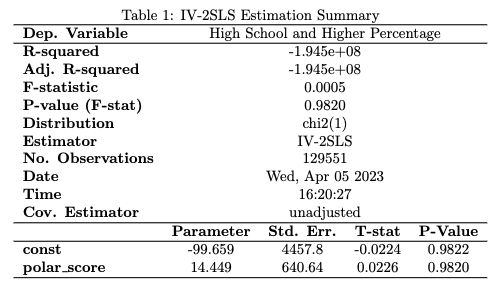

The above output says a positive relationship exists between high school population proportions and the polarization score. However, the T-stat is close to zero, and P-value is very big. Meanwhile, the F-test is also very small. All these testing numbers together imply the relationships this regression shows are not statistically significant. Thus, we should not refer meaningful conclusions from this result. And we should not infer this positive relationship truly exists.

Moreover, because this model is an IV regression model, we can refer to more information. With the testing results and coefficients, we fail to infer any causal effects. More specifically, after controlling for people's income, we cannot say that the education people received made them more or less polarized.

Finally, from the results we have up till now, including the IV regression and the OLS regressions, we can only conclude that education levels alone do have a predictive effect on people's polarization score. However, this effect is not casual. Thus, again, in this paper we will only focus on predictive effects. And in the machine learning below, I will focus on predictions rather than causations.

## 4.2 Machine Learning

In the following section, we will focus on machine learning. Specifically, we are going to draw a regression tree to show the potential distribution and predictions of the data. A regression tree works by splitting the data into subsets that only contain similar target values. Then, it continues to split data into sub-categories for further prediction and data-fitting. Finally, each node in the tree represents a prediction for the Y variable, which is typically the average value of the Y variable.

##### First, we will go through how the regression tree model works
In the regression tree, we split the data using the minimum MSE. In this case, the first split on the node is on racial diversity score. Then, we continue to split the remaining data according to whichever has the lowest MSE. For each node, we solve for:

$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

The reasonel behind this is to find the decision tree that best fits the given data, by minimizing the sum of squared errors between the predicted values $\hat{f}(x)$ and the actual values $y$, like the formula shown below:

$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

##### Now, we will apply this model to our dataset
For this regression tree, I will choose the variables: diversity score, created day, and user join year. The reason for these three variables is that: those three variables showed both economically and statistically significant relationships to the polarization score in previous parts. Thus, it makes sense to look further into those three variables and how they make combined predictions on the polarization score.

One parameter is alpha shown in the minimization equation. Alpha controls the allowance for error in the regression tree model as a penalty factor. With a larger alpha, the tree will be smaller. In this paper, we will not adjust the alpha as it's complicated and hard to adjust.

Another regularization parameter is the max stepth. This parameter determines the maximum number of splits a tree can go, is set to 3 in this case. If we are to decrease the number on the max depth, we are loosing precision and may not predict the numbers well. If we are to increase the number on the max depth, it would further increase the MSE, resulting a less precise model - which could also over-fit the data. Thus, a max depth of 3 is chosen in this case.

Thus, in conclusion, the overall regression tree formula is as follows. Particularly, this function tries to solve and get the minimum MSE at each split according to the three variables we have chosen.

$$
\min_{j,s} \left[  \sum_{i: RacialDiversity_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: RacialDiversity_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right],
\left[  \sum_{i: CreatedDay_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: CreatedDay_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right],
$$
$$
\left[  \sum_{i: JoinYear_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: JoinYear_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

And we will now begin building the program to run the regression tree.

In [84]:
# import tools for machine leanring
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

# merge all four datasets
tweet_ml = tweet[['tweet_id','polar_score']]
# Merge "InUS" and "join_year" columns from tweet_reg1 to tweet_ml based on "tweet_id"
tweet_ml = pd.merge(tweet_ml, tweet_reg1[['tweet_id', 'join_year']], on='tweet_id', how='left')
# Merge the "created_day" column from tweet_reg2 to tweet_ml
tweet_ml = pd.merge(tweet_ml, tweet_reg2[['tweet_id', 'created_day']], on='tweet_id', how='left')
# Merge the "Racial Diversity" column from reg4_merged_df to tweet_ml based on "tweet_id"
tweet_ml = pd.merge(tweet_ml, reg4_merged_df[['tweet_id', 'Racial Diversity']], on='tweet_id', how='left')
tweet_ml = tweet_ml.dropna()

# Define X and y variables
X = tweet_ml[['join_year','created_day','Racial Diversity']]
y = tweet_ml['polar_score']

# Initialize and fit decision tree model
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

# Make predictions on test data and calculate RMSE
y_pred = tree_reg.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)

print('Regression Tree RMSE:', rmse)

Regression Tree RMSE: 24.674142573929064


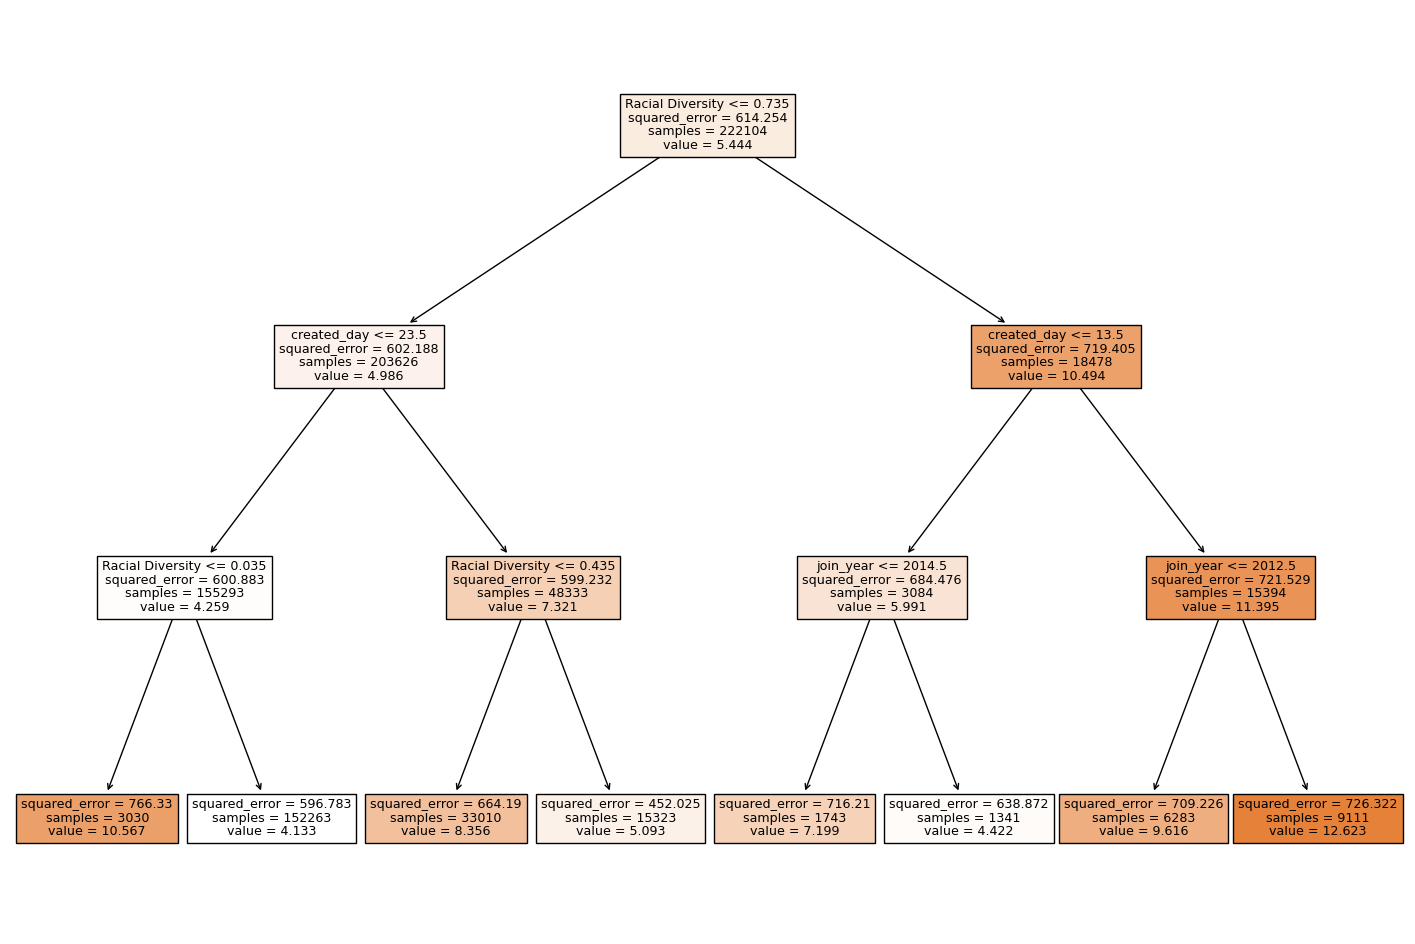

In [85]:
plt.figure(figsize=(18,12))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()

In the regression tree, from observations, we can tell that the model splits the data in the following sequence: racial diversity, created day, then user join year. Firstly, the data was divided by diversity score at a threshold of 73.5% with a total of 0.22 million samples. This first split gives a prediction of a polarization score of 5.4. Then, the samples are split by the tweet created day at a threshold of 23.5 and 13.5. The split gives predictions of polarization scores of 4.99 and 10.5, respectively. Then, the model goes into the third split and the predictions for those splits. The model stops at our max depth, which is three splits.

In terms of error of predictions, the MSE is 24.7, which is acceptable considering that the Y ranges from -100 to 100. However, this error is not ideal. An ideal MSE would be smaller than 10%, which in this case is smaller than 20(100-(-100) = 200, 200*0.1 = 20). The reason for a bigger MSE could be multiple reasons. First, it might be the sample size that is too big. Because we have too much variation within the sample and more than 0.2 million observations in this case, a bigger-than-normal MSE is reasonable. Second, as we introduced above, one X can have multiple corresponding Y(people in Canada share the same number for population number, but people in Canada have different polarization scores, so one population number corresponds to multiple Y). Thus, this effect will also make the MSE larger. A solution to this problem is to gather data on states instead of countries to narrow down the focus - but it will be very hard to find population and GPD data for all states in all countries in the world.

Meanwhile, the reddish the box is, the higher the polarization score predictions. Thus, we can see that the split to the right has a reddish box. This box would indicate that higher racial diversity(first split), closer to election day(higher created day in the second split), and fewer previous internet exposure(higher join year in the third split) will predict the highest polarization score. This conclusion matches what we had in the regression models above, where we also find the same predictive trend those variables have on the polarization score.

However, we can find more information on the regression tree that is unavailable on the normal regression results. In the above results, the OLS coefficient for those X variables is considerably small, but the differences between splits on the regression tree are big. For example, the OLS slope of "created day" is 0.168 points; the second split, also for "created day," has a difference of about 5 points. This result means that after splitting and grouping those data, we can easier and more accurately identify the predictive trends. The potential intuition behind this phenomenon is that we have too many observations lying at low racial diversity scores. Thus, in an OLS regression, the slope will be drawn by the mass of observations at a low diversity score so that the OLS slope will be smaller. Instead, in a regression tree, when we group by MSE, the mass observations are grouped together, so we can better tell the relationships along the change of X variables.

## 4.3 Regression and Machine Learning Sction Short Summarization

We've seen four models of different factors and variables, and a regression tree that validated the results of the OLS models. Each of these models have shown predictive effects of X variables on the polarization score. Thus, it's important to do a quick summarization here.

Overall, we say that diversity levels, education levels, user's internet exposure, and the time to election can well predict people's sentiments and polarization, while other terms do not show economically significant relationships.

## 4.4 Conclusion

In this paper, we've looked into the several most important variables and how they affect people's polarity by conducting sentiment analysis. And again, as mentioned before, this paper is to work on an overall sentiment and polarization analysis during the 2020 election by researching different topics of variables, such as user-specific, education levels, economic-specific and tweet specific. Thus, we would say that economic terms such as diversity score, education levels and created day can well predict polarization score, while some other terms do not show economically significant relationships. Specifically, we predict that: people with higher education, more internet exposure, people who are more diverse and more inclusive, and people who are away from major global events tend to be less opinionated and less polarized. While a short sentence cannot fully describe all significant relationships, preferably, we should be looking into those relationships and seeing the messages one by one. Only in this way can we have meaningful implementations of economic concepts and interpretations of this sentiment analysis.

From the initial visualizations, such as scatter plots and line graphs, we first glanced at the potential predictive effects of the X variables. Then, we summarized that Asian countries are more polarized, people with less internet exposure tend to be more polarized, and people get more polarized when it gets closer to the US election.

From the above graphs and maps, although some graphs contradict each other, we can still infer several important conclusions. The conclusions are: when it gets closer to the US election, people are getting more than more polarized; the polarization score difference is not significant across the US, but comparatively, most high-scoring states are in the east of the US, while lots of low scoring states are in the south; and different levels of education could cause the reason for that in different states; North American and African countries tend to be more opinionated than countries in other continents, this could be the effect of a more diversified environment; and that there are no significant relationships between fans owned and polarization score.

From the regression results above, each of the four models has shown predictive effects of X variables on the polarization score. And overall, we say that diversity levels, education levels, user's internet exposure, and the time of the election can well predict people's sentiments and polarization. At the same time, other terms do not show economically significant relationships. Specifically, people get more polarized when it's closer to election; people who are more educated are less polarized; and people with less internet exposure tend to be more polarized.

Still, even though we believe the conclusions on the four X variables are well-supported, we must be aware of the potential existence of other lurking variables. We only controlled three variables for each regression, and this procedure helps with managing potential lurking effects. However, there might be other variables we may have yet to notice. Further research into sentiment analysis may help us identify the factors we should better control in a regression. Meanwhile, even though TextBlob is believed to accurately identify the polarization score on people's speeches, AI and natural language processing is still a developing field(Barai, 2021). Textblob model, in some extreme cases, can fail to identify human's sentiments accurately(Barai, 2021). Therefore, we should be more careful when processing those data. Finally, as we cannot access Twitter API at this time, we could not investigate the effects of the US election. However, in the near future, we expect Twitter to open their API systems with more analysis tools and better API services(Barnes, 2023). Then, we can gather new data and form further analysis on the effects the US election event.
   
In this report and dataset, we only observed the relationships to certain important X variables. In the future, we could explore how those polarization scores reflect people's emotions or living standards; and find some predictions between the five variables and people's emotional standards.

# 5. References

Agarwal, A., Xie, B., Vovsha, I., Rambow, O., &amp; Passonneau, R. J. (2011). Sentiment analysis of Twitter data. ACL Anthology. Retrieved March 31, 2023, from https://aclanthology.org/W11-0705/ 

Barai, M. K. (2021, October 26). Sentiment analysis with textblob and vader. Analytics Vidhya. Retrieved March 31, 2023, from https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/ 

Barnes, J. (2023, February 6). Twitter ends its free API: Here's who will be affected. Forbes. Retrieved April 5, 2023, from https://www.forbes.com/sites/jenaebarnes/2023/02/03/twitter-ends-its-free-api-heres-who-will-be-affected/?sh=749cbb286266 

Hui, M. (2020, November 9). US election 2020 tweets. Kaggle. Retrieved March 31, 2023, from https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets 

Pagolu, V. S., Reddy, K. N., Panda, G., &amp; Majhi, B. (2016). Sentiment analysis of Twitter data for predicting stock movements. Institute of Electrical and Electronics Engineers. Retrieved March 31, 2023, from https://ieeexplore.ieee.org/abstract/document/7955659 

Siebeneck, T., &amp; Wang, C. (2023). GDP of US States. GDP by State 2023. Retrieved April 5, 2023, from https://worldpopulationreview.com/state-rankings/gdp-by-state 

Wikipedia, C. (2023, April 4). List of countries and dependencies by population. Wikipedia. Retrieved April 3, 2023, from https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population 

Wikipedia, C. (2023, February 16). List of U.S. states and territories by educational attainment. Wikipedia. Retrieved April 3, 2023, from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment 

Wikipedia, C. (2023, March 9). List of countries by GDP (PPP) per capita. Wikipedia. Retrieved April 3, 2023, from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita 

Wu, J., Muccari, R., &amp; Zhou, N. (2020). World watches the U.S. vote: Why the election matters everywhere. NBCNews.com. Retrieved March 31, 2023, from https://www.nbcnews.com/specials/world-watches-us-vote-trump-biden-election/ 